In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
plt.style.use("ggplot")

### Информация о датасете

- age – возраст основного застрахованного
- sex – пол страхователя
- bmi – индекс массы тела (ИМТ), показывающий, является ли вес относительно высоким или низким по отношению к росту.
Объективный показатель массы тела (кг/м²), рассчитываемый как отношение веса к квадрату роста.
Идеальный диапазон: 18.5 – 24.9
- children – количество детей
- smoker – является ли человек курильщиком
- region – регион проживания застрахованного в США (северо-восток, юго-восток, юго-запад, северо-запад)
- charges – индивидуальные медицинские расходы, выставленные страховой компанией

In [75]:
# расположение датасета
PATH = "insurance.csv"

In [76]:
df = pd.read_csv(PATH)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Теория вероятностей и мат. статистика пункт 1

## Intro

Цель исследования – выявить закономерности в данных, определить группы клиентов с различными уровнями медицинских расходов и проанализировать возможные причины этих различий.

Методология:

- Разведочный анализ данных (EDA):

    - Исследование распределений признаков и их взаимосвязей.
    - Сегментация данных по ключевым параметрам (BMI, курение).
    - Проверка различий между группами с использованием PSI и KS-теста.

- Формулирование и тестирование гипотез:

    - Выдвижение гипотез о различиях между группами клиентов.
    - Проверка статистическими методами (Mann-Whitney U-test, Kruskal-Wallis, Chi-square).
    - Оценка точечных и интервальных оценок с применением бутстрэпа.

- Формирование продуктовых гипотез и стратегий:

    - Определение групп с наибольшими медицинскими расходами.
    - Анализ возможных причин различий.
    - Разработка предложений по оптимизации страховых выплат.

Ожидаемые результаты:

- Оценка влияния различных факторов на медицинские расходы.
- Статистически подтверждённые различия между группами.
- Выводы и рекомендации по управлению страховыми выплатами.

In [77]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


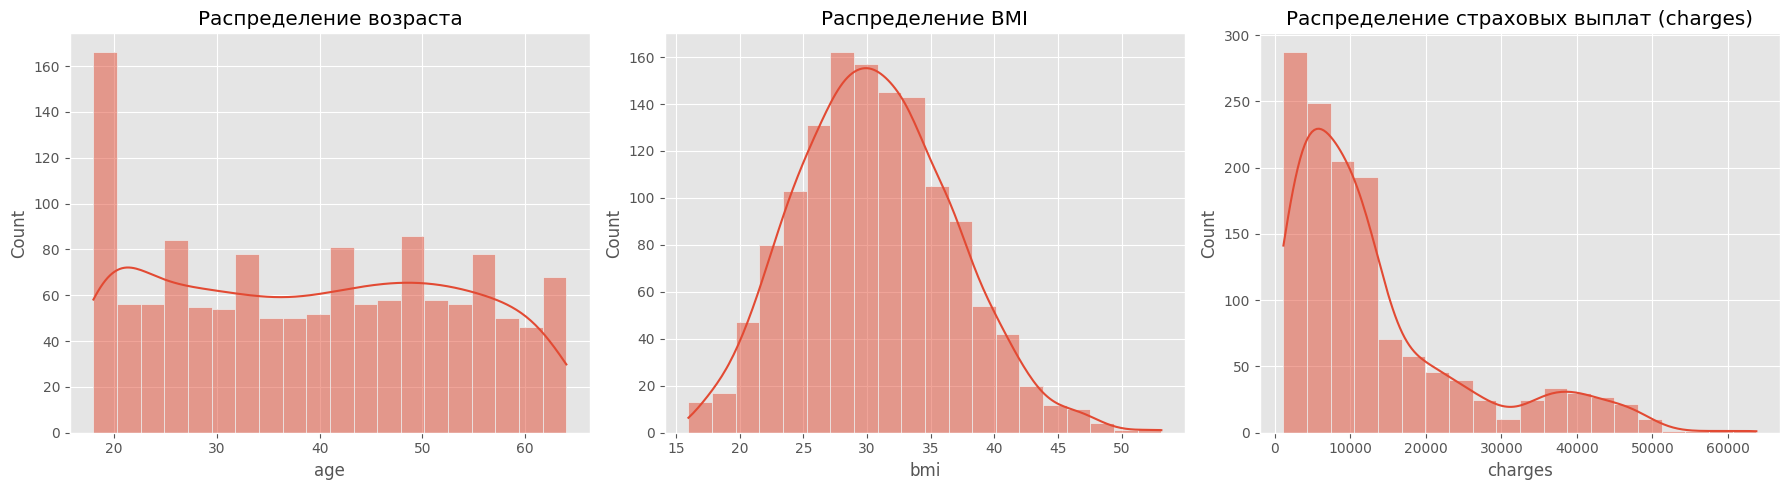

In [79]:
# Создание графиков распределения числовых переменных
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Распределение возраста')

sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Распределение BMI')

sns.histplot(df['charges'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Распределение страховых выплат (charges)')

plt.tight_layout()
plt.show()

## Численные переменные

- вораст: почти равномерное, количество детей самое большое

- индекс массы тела bmi: среднее = 30, много людей с ожирением

- страховые выплоты: сильно скошено право

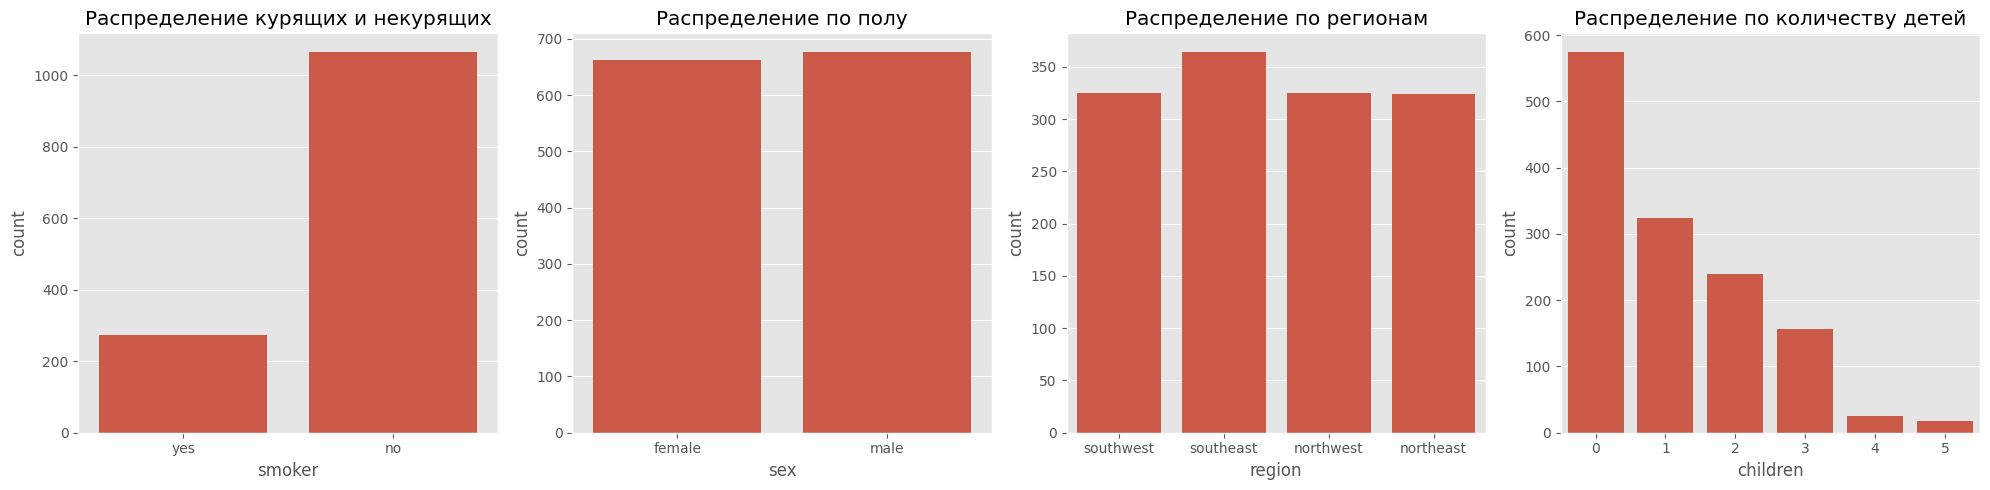

In [80]:
# Графики для категориальных переменных
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.countplot(x=df['smoker'], ax=axes[0])
axes[0].set_title('Распределение курящих и некурящих')

sns.countplot(x=df['sex'], ax=axes[1])
axes[1].set_title('Распределение по полу')

sns.countplot(x=df['region'], ax=axes[2])
axes[2].set_title('Распределение по регионам')

sns.countplot(x=df['children'], ax=axes[3])
axes[3].set_title('Распределение по количеству детей')

plt.tight_layout()
plt.show()

## Категориальные переменные

- курение: некурящих намного больше чем курящих

- пол: мужчин и женщин примерно одинаково

- распределение между регионами примерно равномерное

- дети: больше 3 детей у человека редко

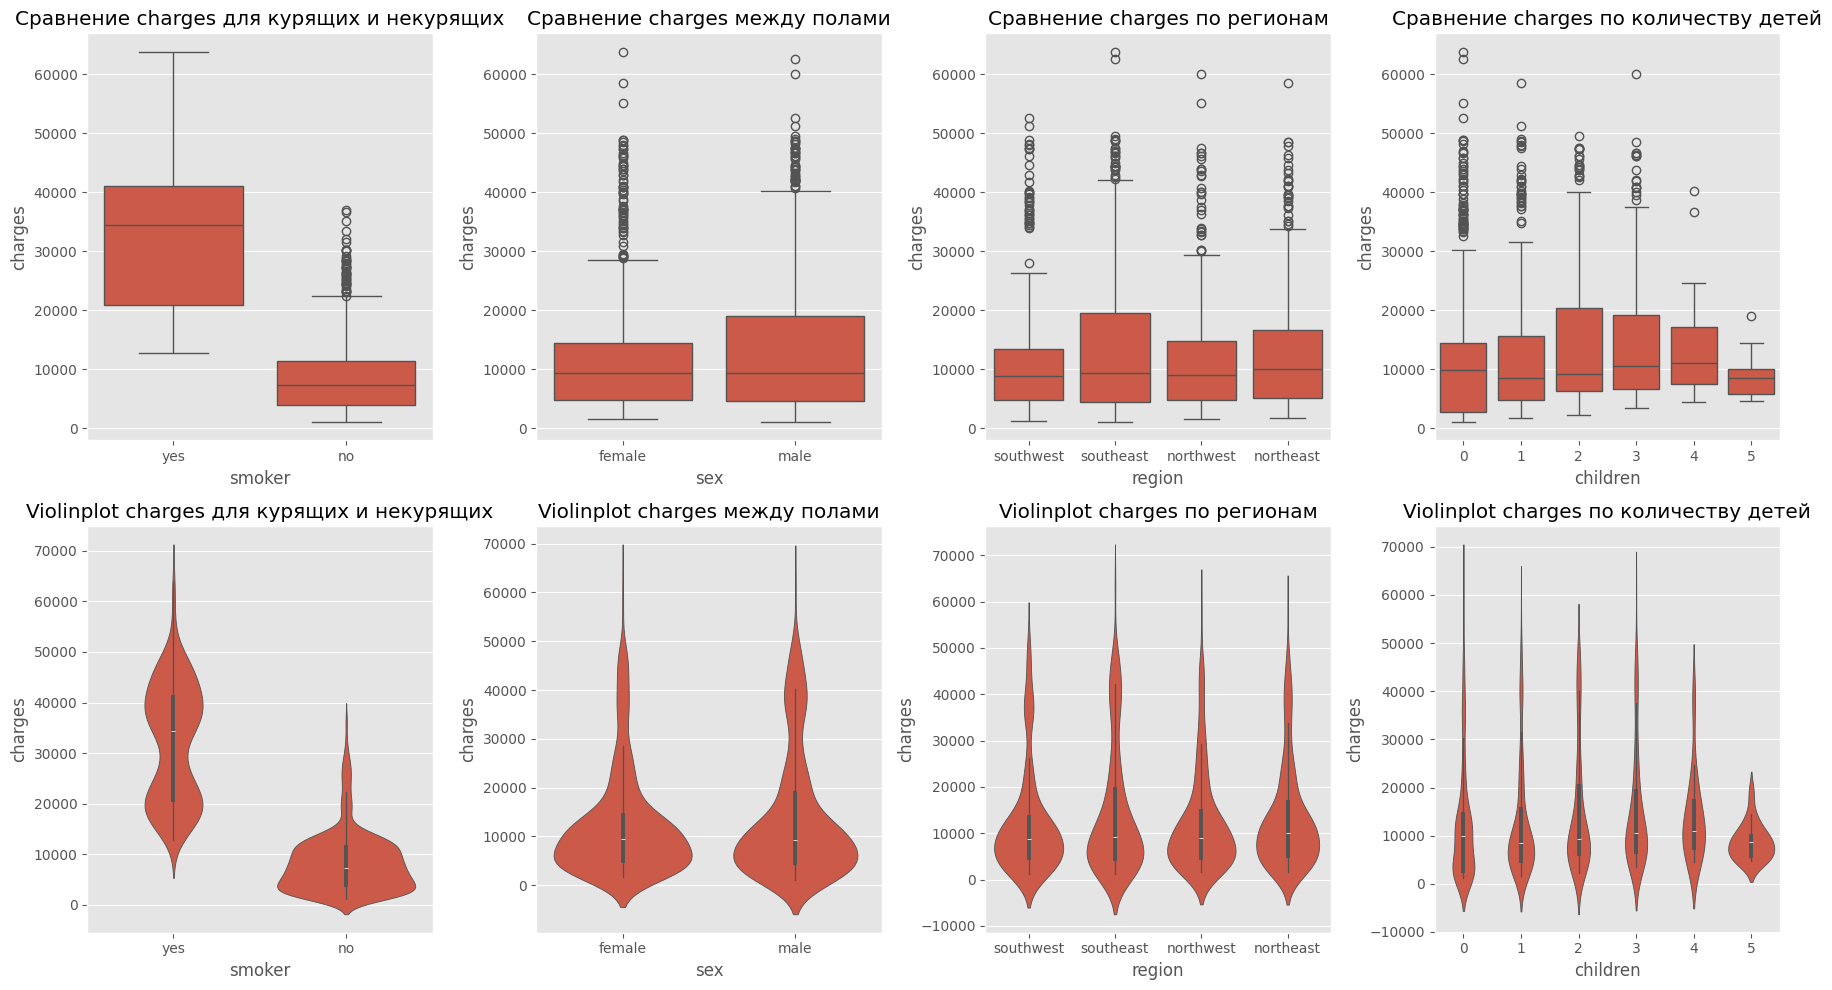

In [81]:
# Boxplot и Violinplot для категориальных переменных
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

sns.boxplot(x=df['smoker'], y=df['charges'], ax=axes[0, 0])
axes[0, 0].set_title('Сравнение charges для курящих и некурящих')

sns.boxplot(x=df['sex'], y=df['charges'], ax=axes[0, 1])
axes[0, 1].set_title('Сравнение charges между полами')

sns.boxplot(x=df['region'], y=df['charges'], ax=axes[0, 2])
axes[0, 2].set_title('Сравнение charges по регионам')

sns.boxplot(x=df['children'], y=df['charges'], ax=axes[0, 3])
axes[0, 3].set_title('Сравнение charges по количеству детей')

sns.violinplot(x=df['smoker'], y=df['charges'], ax=axes[1, 0])
axes[1, 0].set_title('Violinplot charges для курящих и некурящих')

sns.violinplot(x=df['sex'], y=df['charges'], ax=axes[1, 1])
axes[1, 1].set_title('Violinplot charges между полами')

sns.violinplot(x=df['region'], y=df['charges'], ax=axes[1, 2])
axes[1, 2].set_title('Violinplot charges по регионам')

sns.violinplot(x=df['children'], y=df['charges'], ax=axes[1, 3])
axes[1, 3].set_title('Violinplot charges по количеству детей')

plt.tight_layout()
plt.show()

- курение: курильщики платят больше
- пол: у мужчин чуть больше крайних значений
- регион: выплоты от региона не сильно зависят
- дети: количество детей незначительно влияет на выплаты, у человека с 5 детьми выплат чуть меньше

In [82]:
# Закодируем курильщиков, так они влеяют на таргет и мы хотим посмотреть на этот признак в матрице корреляций
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

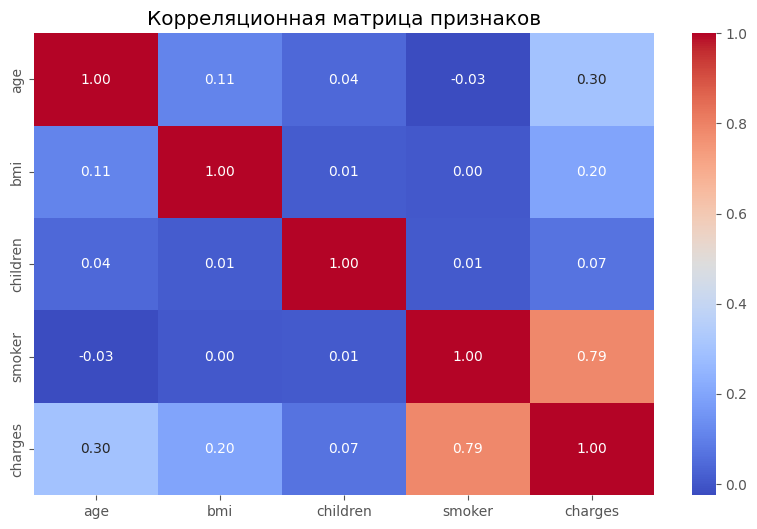

In [83]:
# Корреляционная матрица
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

- чем старше человек, тем выплоты больше
- курение это главный фактор увеличивающий выплаты
- не сильная корляция между индексом и выплатами, но чем больше есть лишнего веса то тем больше выплаты  

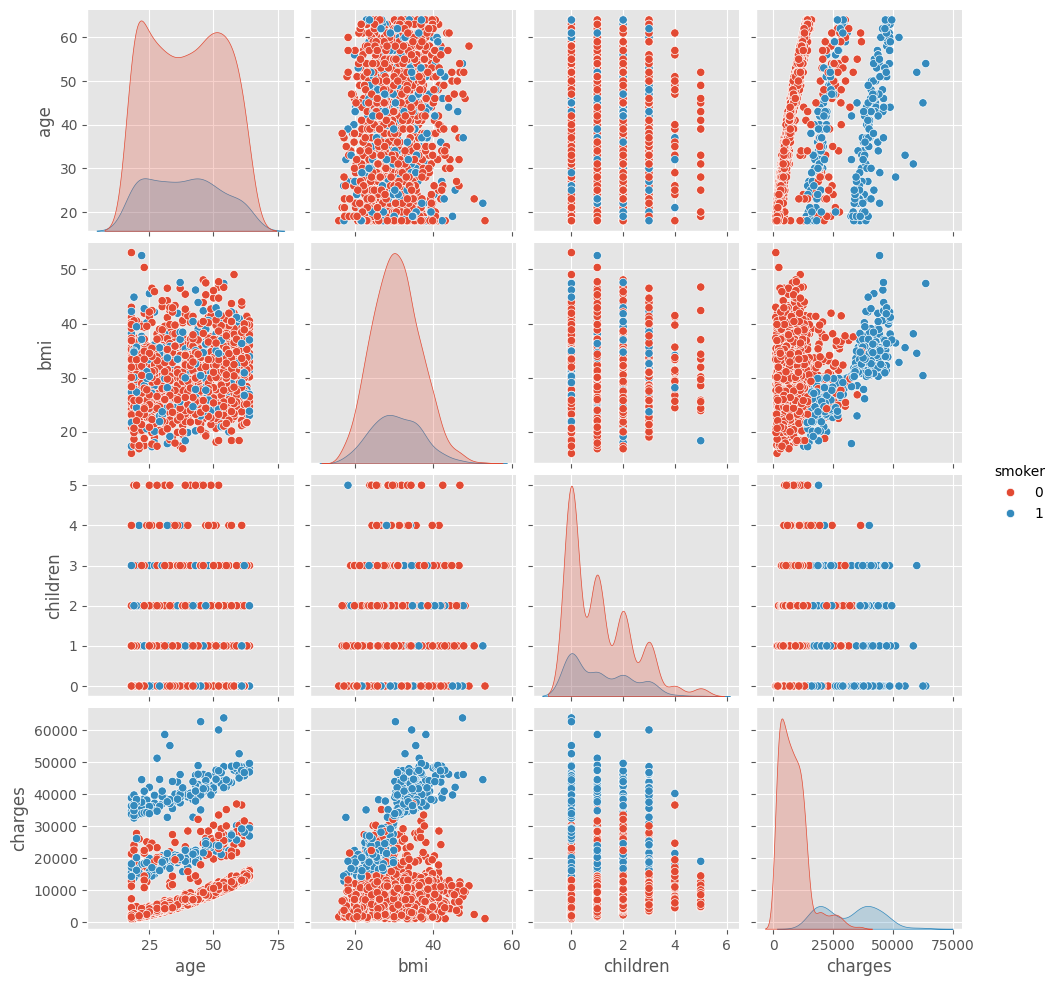

In [84]:
# Pairplot для анализа взаимосвязи числовых переменных
sns.pairplot(df, hue="smoker", diag_kind="kde")
plt.show()

Детальней построим графики charges vs age и charges vs bmi

In [85]:
!pip install plotly

In [86]:
import plotly.express as px

In [87]:
map = {"No": "red", "Yes": "blue"}

df_plt = df.copy()
df_plt["smoker"] = df_plt["smoker"].map({0: "No", 1: "Yes"})

# Charges vs Age (разделение по курению)
fig_age = px.scatter(
    df_plt, x="age", y="charges", color="smoker",
    title="Charges vs Age",
    labels={"age": "Age", "charges": "Insurance Charges", "smoker": "Smoking Status"},
    hover_data=["bmi", "children", "region"],
    color_discrete_map=map
)
fig_age.show()

С возрастом выплаты растут у всех

Три уровня выплат

1. низкие выплаты: не курящие
2. средние выплаты: не курящие и курящие
3. высокие выплаты: курящие

Возможно будет полезная новая фича age

In [88]:
# Charges vs BMI (разделение по курению)
fig_bmi = px.scatter(
    df_plt, x="bmi", y="charges", color="smoker",
    title="Charges vs BMI",
    labels={"bmi": "BMI", "charges": "Insurance Charges", "smoker": "Smoking Status"},
    hover_data=["age", "children", "region"],
    color_discrete_map=map
)
fig_bmi.show()

Для некурящих bmi почти не влияет на выплату

Для курящих с bmi > 30 выплаты резко увеличиваются

Почти все выплаты которые больше 30k принадлежат курильщикам с лишним весом



## Исследуем распределения между когортами
У нас есть 4 когорты людей:
- те кто курит и bmi > 30
- те кто НЕ курит и bmi > 30
- те кто курит и bmi <= 30
- те кто НЕ курит и bmi <= 30

Сравним эти когорты между собой и посмотрим различаются ли у них между собой распределения выплат

### Визульное сравнение

In [89]:
df['bmi_category'] = df['bmi'].apply(lambda x: '>30' if x > 30 else '<=30')

df['cohort'] = df.apply(lambda row: f"Smoker, BMI {row['bmi_category']}" if row['smoker'] == 1 else f"Non-Smoker, BMI {row['bmi_category']}", axis=1)

# Группируем когорты
cohorts = df['cohort'].unique()

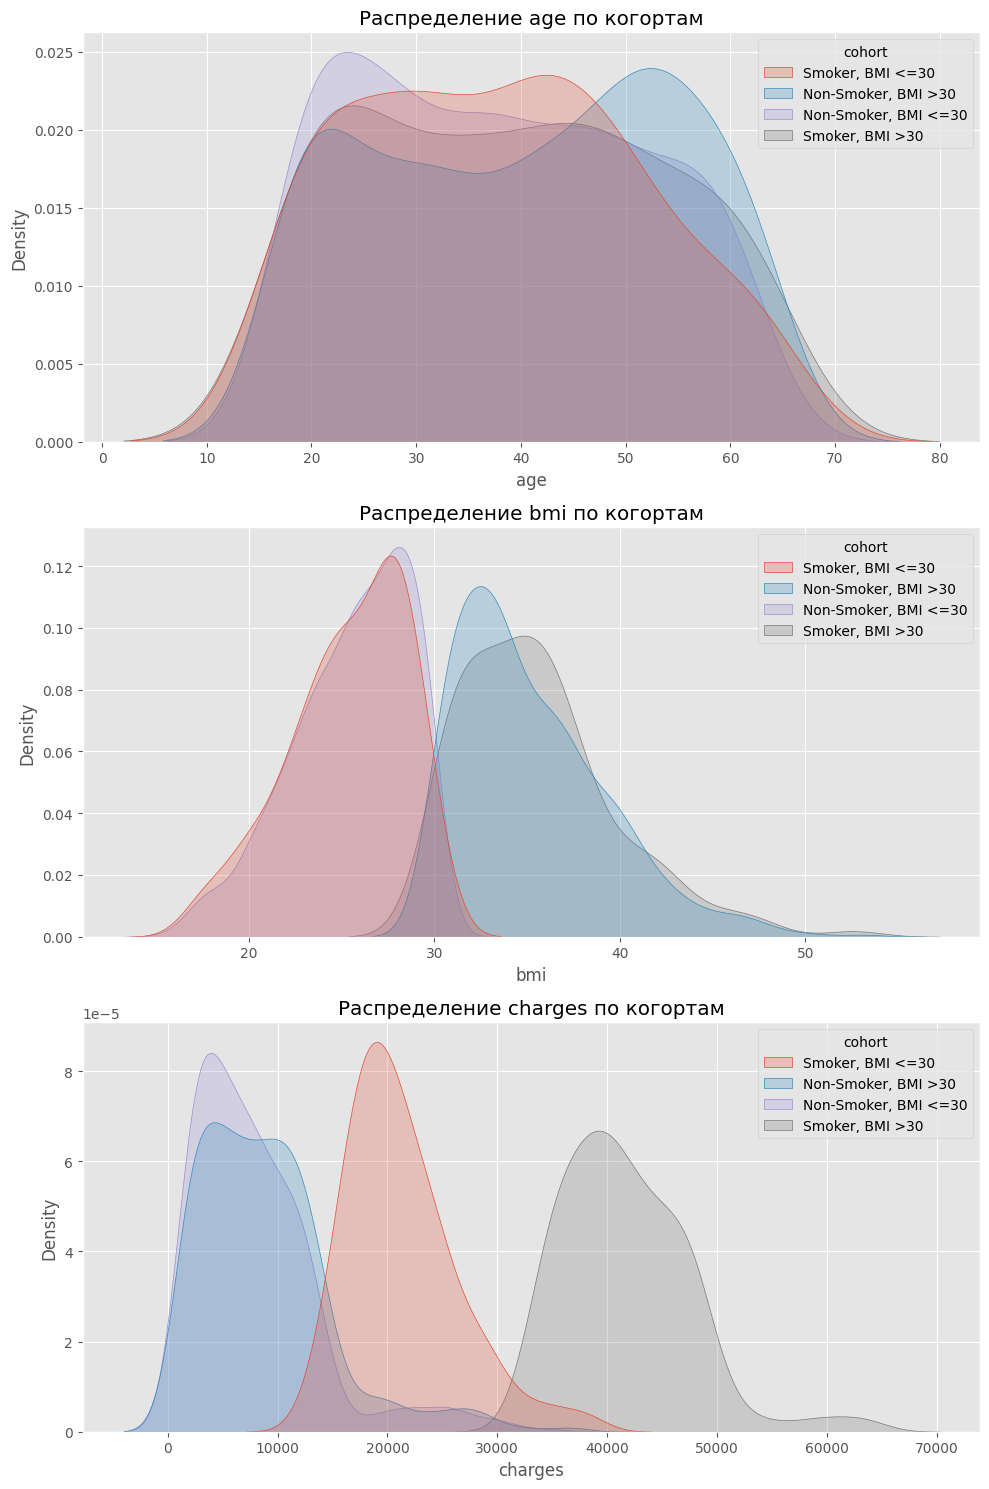

In [90]:
# Построение KDE-графиков для числовых переменных
numeric_columns = ['age', 'bmi', 'charges']

fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 15))
for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=df, x=col, hue='cohort', fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(f'Распределение {col} по когортам')

plt.tight_layout()
plt.show()

### Возраст по когортам:
- некурящих без лишнего веса становится меньше после 35
- некурящих с лишним весом становится больше после 35
- курящих без лишнего веса становится больше после 35
- некурящих без лишнего веса становится меньше после 35

Возможно приблизительно в 35 лет люди испытывают стресс, начинают курить и полнеть, возможно испытывают кризис среднего возраста.

Возможно важная фича - метка достиг ли человек 35 возраста.

### bmi (индекс массы тела) по когортам:
- группы bmi <= 30 и bmi > 30 имеют четкое разделение
- курение не сильно влияет на bmi

### Выплаты по когортам:
- курящие и некурящие без лишнего веса имеют примерно одинаковое распределения
- другие же распределения сильно отличаются
- люди с лишним весом имеют более высокие выплаты независимо от того курят ли они
- курение и есть ли лишний вес это сильная комбинация
- выплаты курящих без лишнего веса примерно начинаются с 10_000
- выплаты курящих с лишним весом примерно начинаются с 30_000



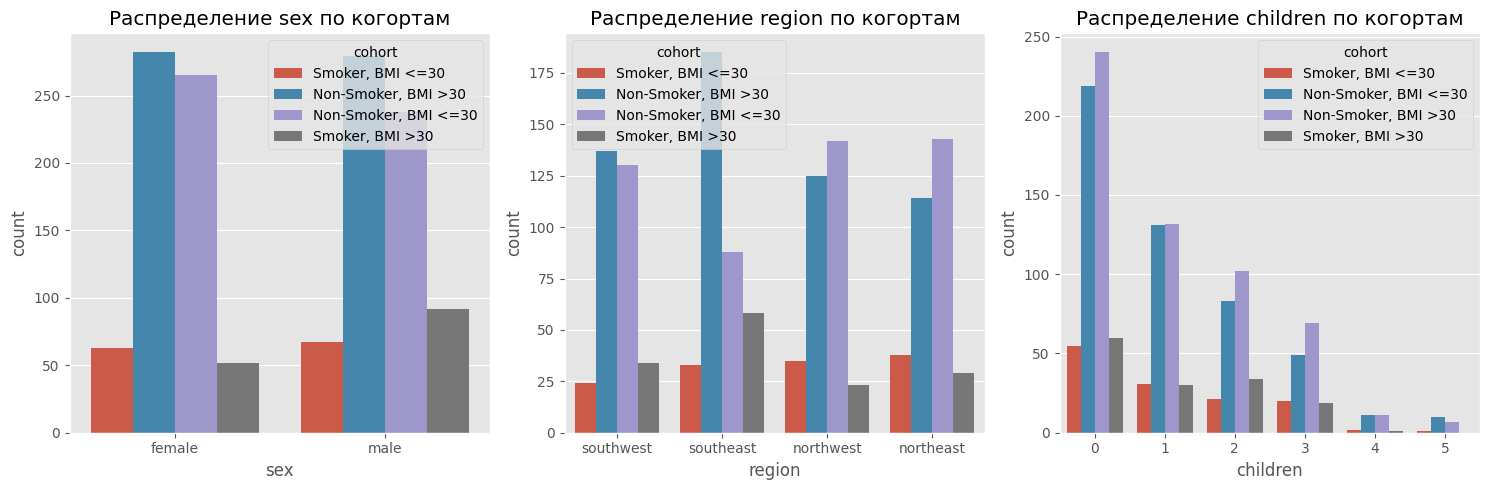

In [91]:
# Построение CountPlot для категориальных переменных
categorical_columns = ['sex', 'region', 'children']

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='cohort', ax=axes[i])
    axes[i].set_title(f'Распределение {col} по когортам')

plt.tight_layout()
plt.show()

### Пол по когортам:
- курящих с лишним весом больше почти в 2 раза мужчин чем женщин
- курящих мужчин в целом больше чем женщин

### Регион по когортам:
- в southeast рекордное количество не курящих с ожирением
- курильщиков гораздо меньше во всех регионах

### Количество детей по когортам:
- людей с лишним весом и без примерно одинаковое количество когда ребенок 1

### Численное сравнение

- age (числовой): KS
- bmi (числовой): KS
- charges (числовой)KS
- sex (категориальный): PSI
- region (категориальный): PSI
- children (дискретный): PSI

Для дискретных распределений используем PSI, а для числовых ks

In [92]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Функция для расчёта KS-теста
def ks_test(df, feature, cohort1, cohort2):
    """
    Проверяет различия в распределении переменной feature между cohort1 и cohort2 с помощью KS-теста.
    """
    group1 = df[df['cohort'] == cohort1][feature].dropna()
    group2 = df[df['cohort'] == cohort2][feature].dropna()

    if len(group1) == 0 or len(group2) == 0:
        return np.nan, np.nan  # Если нет данных в одной из групп, возвращаем NaN

    ks_stat, p_value = stats.ks_2samp(group1, group2)
    return ks_stat, p_value

# Функция для расчёта PSI
def psi(expected, actual):
    """
    Вычисляет PSI для категориальных переменных.
    expected - эталонное распределение (Series категорий)
    actual - сравниваемое распределение (Series категорий)
    """
    expected_counts = expected.value_counts(normalize=True).to_dict()
    actual_counts = actual.value_counts(normalize=True).to_dict()
    all_categories = set(expected_counts.keys()).union(set(actual_counts.keys()))

    psi_value = 0
    for category in all_categories:
        expected_perc = expected_counts.get(category, 1e-6)  # Избегаем 0
        actual_perc = actual_counts.get(category, 1e-6)

        psi_value += (expected_perc - actual_perc) * np.log(expected_perc / actual_perc)

    return psi_value

cohorts = sorted(df['cohort'].unique())

# Разделение признаков
ks_features = ['age', 'bmi', 'charges']
psi_features = ['sex', 'region', 'children']

ks_results = []

for i in range(len(cohorts)):
    for j in range(i+1, len(cohorts)):
        cohort1, cohort2 = cohorts[i], cohorts[j]
        for feature in ks_features:
            ks_stat, p_value = ks_test(df, feature, cohort1, cohort2)
            significant = 1 if p_value < 0.05 else 0
            ks_results.append([cohort1, cohort2, feature, ks_stat, p_value, significant])

ks_df = pd.DataFrame(ks_results, columns=['Cohort 1', 'Cohort 2', 'Feature', 'KS Statistic', 'P-value', 'Significant'])

psi_results = []

for i in range(len(cohorts)):
    for j in range(i+1, len(cohorts)):
        cohort1, cohort2 = cohorts[i], cohorts[j]
        for feature in psi_features:
            psi_value = psi(df[df['cohort'] == cohort1][feature], df[df['cohort'] == cohort2][feature])
            significant = 1 if psi_value >= 0.25 else 0
            psi_results.append([cohort1, cohort2, feature, psi_value, significant])

psi_df = pd.DataFrame(psi_results, columns=['Cohort 1', 'Cohort 2', 'Feature', 'PSI Value', 'Significant'])


Если p-value < 0.05, различие статистически значимо Significant=1

In [93]:
ks_df.sort_values(by='Feature')

,Cohort 1,Cohort 2,Feature,KS Statistic,P-value,Significant
0,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30",age,0.111428,2.483719e-03,1
15,"Smoker, BMI <=30","Smoker, BMI >30",age,0.085897,6.517039e-01,0
3,"Non-Smoker, BMI <=30","Smoker, BMI <=30",age,0.046964,9.667692e-01,0
6,"Non-Smoker, BMI <=30","Smoker, BMI >30",age,0.061727,7.595583e-01,0
9,"Non-Smoker, BMI >30","Smoker, BMI <=30",age,0.141876,2.542890e-02,1
12,"Non-Smoker, BMI >30","Smoker, BMI >30",age,0.090166,2.885743e-01,0
1,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30",bmi,1.000000,2.009034e-318,1
4,"Non-Smoker, BMI <=30","Smoker, BMI <=30",bmi,0.083683,4.366096e-01,0
7,"Non-Smoker, BMI <=30","Smoker, BMI >30",bmi,1.000000,5.790634e-148,1
16,"Smoker, BMI <=30","Smoker, BMI >30",bmi,1.000000,1.954230e-81,1


<ipython-input-94-88d11ea2b9cd>:21: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



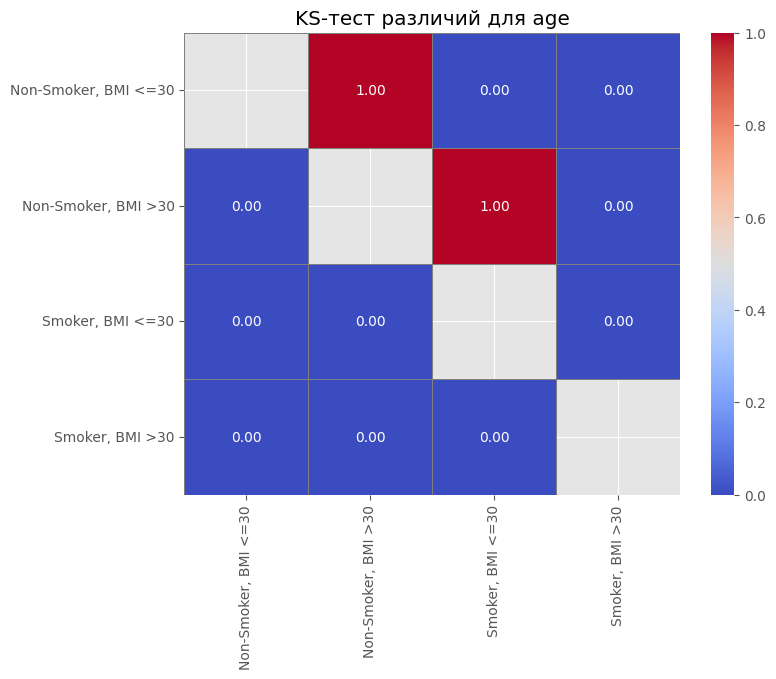

<ipython-input-94-88d11ea2b9cd>:21: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



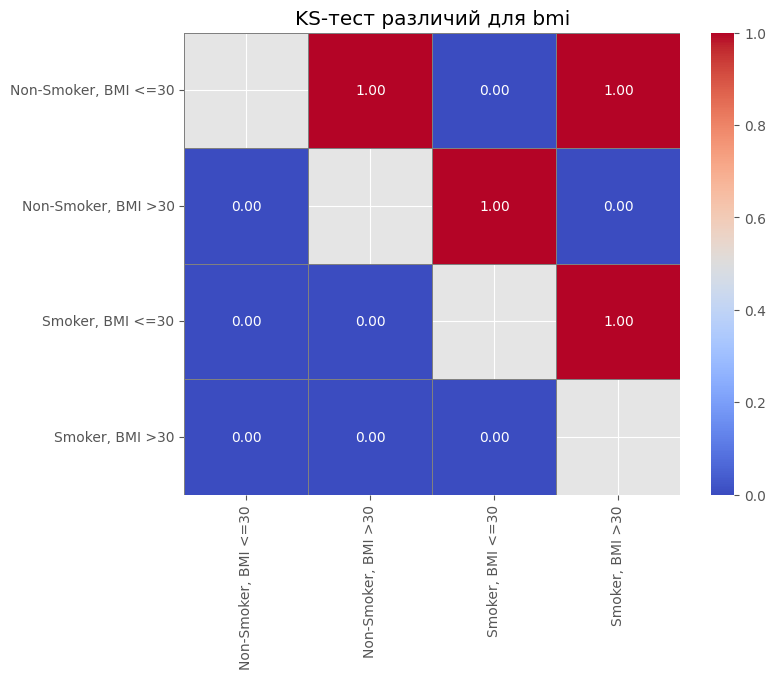

<ipython-input-94-88d11ea2b9cd>:21: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



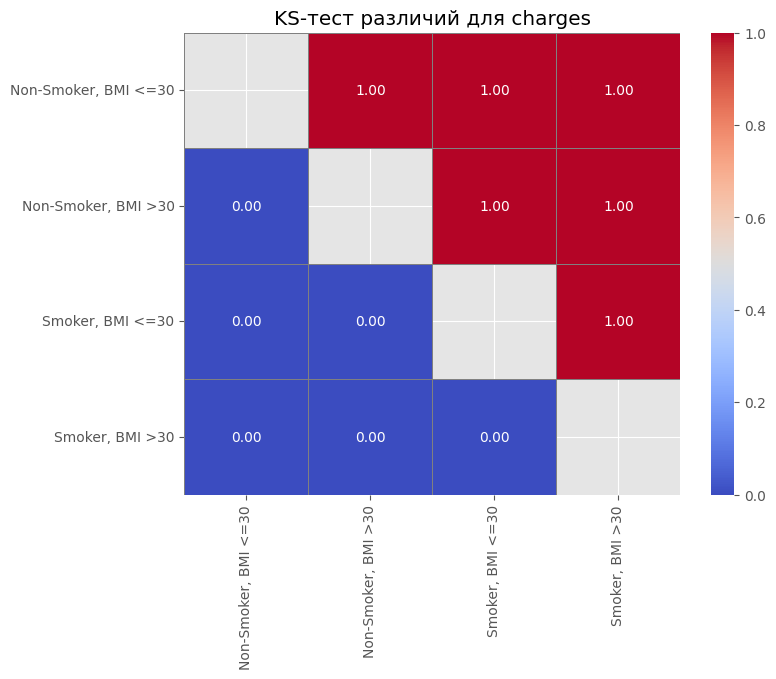

In [94]:
# Создаём матрицы различий для всех непрерывных признаков
ks_features = ['age', 'bmi', 'charges']
cohorts = sorted(df['cohort'].unique())

def build_ks_matrix(df_ks, feature, cohorts):
    """
    Создаёт матрицу различий для указанного признака на основе KS-теста.
    """
    matrix = np.zeros((len(cohorts), len(cohorts)))

    for i, cohort1 in enumerate(cohorts):
        for j, cohort2 in enumerate(cohorts):
            if i == j:
                matrix[i, j] = np.nan
            else:
                row = df_ks[(df_ks["Feature"] == feature) &
                            (df_ks["Cohort 1"] == cohort1) &
                            (df_ks["Cohort 2"] == cohort2)]

                if not row.empty:
                    matrix[i, j] = row["Significant"]

    return matrix

for feature in ks_features:
    ks_matrix = build_ks_matrix(ks_df, feature, cohorts)

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        ks_matrix,
        annot=True,
        fmt=".2f",
        xticklabels=cohorts,
        yticklabels=cohorts,
        cmap="coolwarm",
        cbar=True,
        linewidths=0.5,
        linecolor='gray'
    )

    plt.title(f"KS-тест различий для {feature}")
    plt.show()


## Общие выводы на основе KS-теста


### Возраст:

- люди с BMI >30 в среднем старше, чем с BMI <=30
- некурящие с лишним весом старше, чем курящие без лишнего веса

### Индекс массы тела (bmi):
- все группы с BMI >30 значительно отличаются от BMI <=30

### Страховые выплаты:
- курящие и некурящие сильно различаются по страховым выплатам
- курение + ожирение - самый высокий уровень выплат


Если psi value > 0.25, то различие статистически значимо

In [95]:
psi_df.sort_values(by='Feature')

,Cohort 1,Cohort 2,Feature,PSI Value,Significant
8,"Non-Smoker, BMI <=30","Smoker, BMI >30",children,0.262284,1
14,"Non-Smoker, BMI >30","Smoker, BMI >30",children,0.149211,0
11,"Non-Smoker, BMI >30","Smoker, BMI <=30",children,0.012737,0
5,"Non-Smoker, BMI <=30","Smoker, BMI <=30",children,0.042005,0
17,"Smoker, BMI <=30","Smoker, BMI >30",children,0.111371,0
2,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30",children,0.013975,0
7,"Non-Smoker, BMI <=30","Smoker, BMI >30",region,0.290403,1
16,"Smoker, BMI <=30","Smoker, BMI >30",region,0.172476,0
10,"Non-Smoker, BMI >30","Smoker, BMI <=30",region,0.077713,0
13,"Non-Smoker, BMI >30","Smoker, BMI >30",region,0.035896,0


<ipython-input-96-b6e6f4e39c86>:20: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



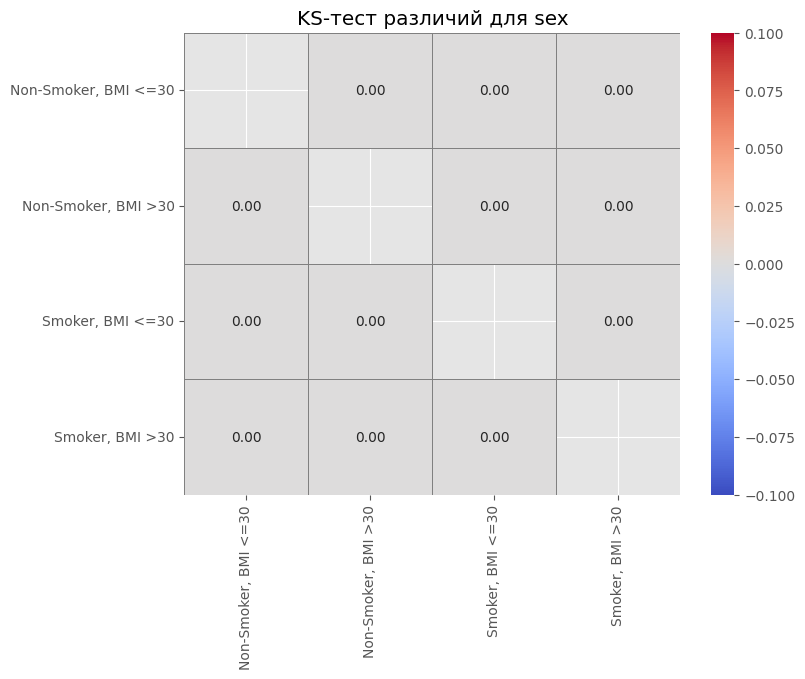

<ipython-input-96-b6e6f4e39c86>:20: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



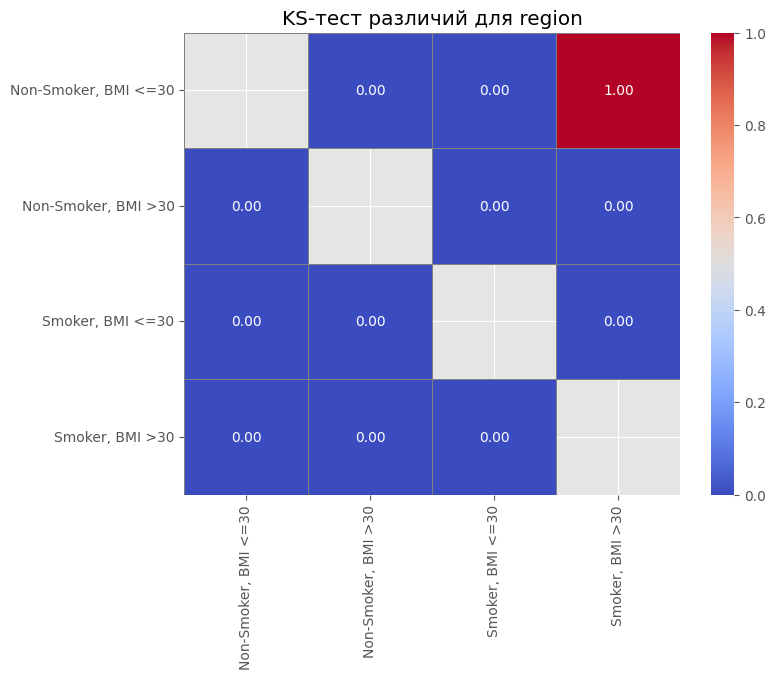

<ipython-input-96-b6e6f4e39c86>:20: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



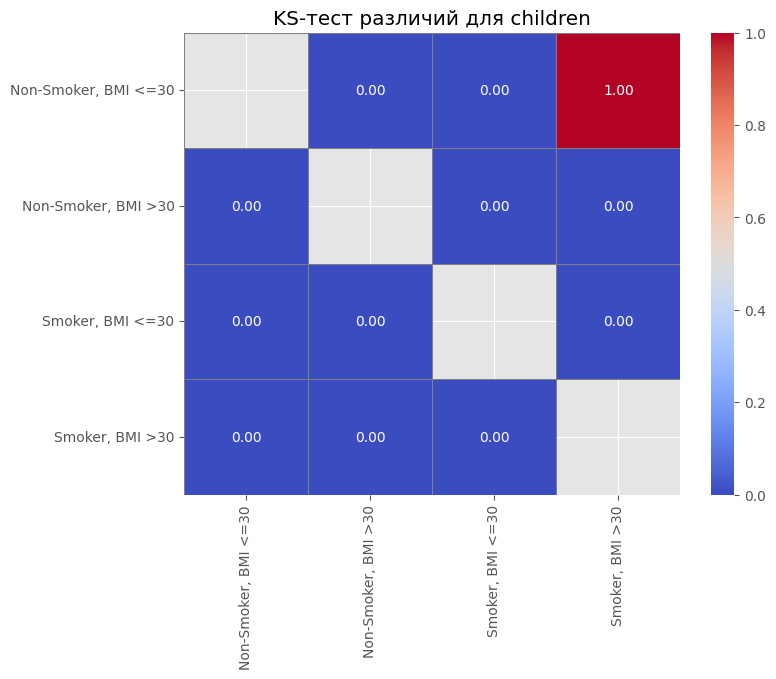

In [96]:
psi_features = ['sex', 'region', 'children']
cohorts = sorted(df['cohort'].unique())

def build_ks_matrix(df_ks, feature, cohorts):
    """
    Создаёт матрицу различий для указанного признака на основе KS-теста.
    """
    matrix = np.zeros((len(cohorts), len(cohorts)))

    for i, cohort1 in enumerate(cohorts):
        for j, cohort2 in enumerate(cohorts):
            if i == j:
                matrix[i, j] = np.nan
            else:
                row = df_ks[(psi_df["Feature"] == feature) &
                            (psi_df["Cohort 1"] == cohort1) &
                            (psi_df["Cohort 2"] == cohort2)]

                if not row.empty:
                    matrix[i, j] = row["Significant"]

    return matrix

for feature in psi_features:
    psi_matrix = build_ks_matrix(psi_df, feature, cohorts)

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        psi_matrix,
        annot=True,
        fmt=".2f",
        xticklabels=cohorts,
        yticklabels=cohorts,
        cmap="coolwarm",
        cbar=True,
        linewidths=0.5,
        linecolor='gray'
    )

    plt.title(f"KS-тест различий для {feature}")
    plt.show()


## Общие выводы на основе PSI-теста

### Пол:
- нет значительных различий во всех сравнениях

### Количество детей:
- курящие с BMI >30 значительно отличаются от некурящих без лишнего веса (BMI <=30) по количеству детей

### Регион:
- есть различия между Non-Smoker, BMI <=30 и Smoker, BMI >30, что может быть вызвано различными условиями жизни (культурные или социальные факторы)

## Теория вероятностей и мат. статистика пункт 2

Проверим на нормальность charges, bmi и age с помощью Shapiro-Wilk потому что у нас всего 1338 наблюдений

In [97]:
from scipy.stats import shapiro

In [98]:
shapiro_results = {
    "Feature": ["charges", "bmi", "age"],
    "W-statistic": [],
    "P-value": [],
    "Normal Distribution": []
}

for feature in ["charges", "bmi", "age"]:
    stat, p_value = shapiro(df[feature])
    shapiro_results["W-statistic"].append(stat)
    shapiro_results["P-value"].append(p_value)
    shapiro_results["Normal Distribution"].append("Yes" if p_value > 0.05 else "No")

shapiro_df = pd.DataFrame(shapiro_results)

In [99]:
shapiro_df

,Feature,W-statistic,P-value,Normal Distribution
0,charges,0.814688,1.150523e-36,No
1,bmi,0.993886,2.604684e-05,No
2,age,0.944701,5.692047e-22,No


Ни один из признаков (charges, bmi, age) не имеет нормального распределения

ANOVA и T-test не подходят, так как они требуют нормальности.

In [100]:
df["cohort"].value_counts()

,count
cohort,
"Non-Smoker, BMI >30",561
"Non-Smoker, BMI <=30",503
"Smoker, BMI >30",144
"Smoker, BMI <=30",130


ГИПОТЕЗЫ:

- H1: Люди с BMI >30 имеют больше детей, чем люди с BMI <=30
- H2: Курение и ожирение усиливают влияние друг на друга на страховые выплаты.
- H3: Курящие и некурящие с BMI >30 имеют схожий BMI.
- H4: Люди с BMI >30 в среднем старше, чем с BMI <=30.

Методы тестирования:

- H1: Mann-Whitney U-test (children – это счётная дискретная переменная у которой есть всего 5 значений и эти значения можно упорядочить)
- H2: Kruskal-Wallis test (У нас 4 когорты, а charges не имеет нормального распределения, разыне размеры выборок)
- H3: Mann-Whitney U-test (BMI не является нормально распределённым, поэтому t-test использовать не надо)
- H4: Mann-Whitney U-test (age не является нормально распределённым)

С поомщью Mann-Whitney сравним медианы

Гипотеза H1: Люди с BMI >30 имеют больше детей, чем люди с BMI <=30

In [101]:
from scipy.stats import mannwhitneyu

children_bmi_more_30 = df[df['bmi_category'] == '>30']['children']
children_bmi_less_30 = df[df['bmi_category'] == '<=30']['children']

# Запускаем тест
stat, p_value = mannwhitneyu(children_bmi_more_30, children_bmi_less_30)

# Формируем результаты
hypothesis_1_results = pd.DataFrame([
    ["H1", "Mann-Whitney U-test", stat, p_value, "Significant" if p_value < 0.05 else "Not Significant"]
], columns=["Hypothesis", "Test Used", "Statistic", "P-value", "Result"])

hypothesis_1_results

,Hypothesis,Test Used,Statistic,P-value,Result
0,H1,Mann-Whitney U-test,227312.5,0.532293,Not Significant


Теперь точечная и интеравальная оценки

In [102]:
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    bootstrapped_medians = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_medians.append(np.median(sample))

    lower_bound = np.percentile(bootstrapped_medians, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_medians, 100 - (100 - ci) / 2)

    return np.median(data), lower_bound, upper_bound

In [103]:
# Разделяем данные по BMI категориям
children_bmi_more_30 = df[df['bmi_category'] == '>30']['children']
children_bmi_less_30 = df[df['bmi_category'] == '<=30']['children']

# Получаем медиану и 95% CI для обеих групп
median_more_30, ci_low_more_30, ci_high_more_30 = bootstrap_ci(children_bmi_more_30)
median_less_30, ci_low_less_30, ci_high_less_30 = bootstrap_ci(children_bmi_less_30)

# Создаём DataFrame с результатами
bootstrap_results = pd.DataFrame([
    [">30", median_more_30, ci_low_more_30, ci_high_more_30],
    ["<=30", median_less_30, ci_low_less_30, ci_high_less_30]
], columns=["BMI Category", "Median Children", "95% CI Lower", "95% CI Upper"])

bootstrap_results

,BMI Category,Median Children,95% CI Lower,95% CI Upper
0,>30,1.0,1.0,1.0
1,<=30,1.0,1.0,1.0


Вывод:
- Медиана количества детей одинакова в обеих группах
- Доверительный интервал также одинаков (1 – 1), что подтверждает отсутствие значимой разницы
- ожирение (BMI >30) не влияет на количество детей в этой выборке.

**Гипотеза H1 отвергнута – люди с BMI >30 не имеют больше детей, чем люди с BMI <=30**

Гипотеза H2: Курение и ожирение усиливают влияние друг на друга на страховые выплаты

In [104]:
from scipy.stats import kruskal

# Получаем данные по выплатам в каждой когорте
charges_non_smoker_bmi_low = df[df['cohort'] == 'Non-Smoker, BMI <=30']['charges']
charges_non_smoker_bmi_high = df[df['cohort'] == 'Non-Smoker, BMI >30']['charges']
charges_smoker_bmi_low = df[df['cohort'] == 'Smoker, BMI <=30']['charges']
charges_smoker_bmi_high = df[df['cohort'] == 'Smoker, BMI >30']['charges']

# Запускаем Kruskal-Wallis
stat, p_value = kruskal(charges_non_smoker_bmi_low, charges_non_smoker_bmi_high,
                        charges_smoker_bmi_low, charges_smoker_bmi_high)

# Формируем результаты
hypothesis_2_results = pd.DataFrame([
    ["H2", "Kruskal-Wallis Test", stat, p_value, "Significant" if p_value < 0.05 else "Not Significant"]
], columns=["Hypothesis", "Test Used", "Statistic", "P-value", "Result"])

hypothesis_2_results

,Hypothesis,Test Used,Statistic,P-value,Result
0,H2,Kruskal-Wallis Test,610.548997,5.205707e-132,Significant


In [105]:
# Получаем бутстрап для всех 4 групп
median_low_nonsmoker, ci_low_low_nonsmoker, ci_high_low_nonsmoker = bootstrap_ci(charges_non_smoker_bmi_low)
median_high_nonsmoker, ci_low_high_nonsmoker, ci_high_high_nonsmoker = bootstrap_ci(charges_non_smoker_bmi_high)
median_low_smoker, ci_low_low_smoker, ci_high_low_smoker = bootstrap_ci(charges_smoker_bmi_low)
median_high_smoker, ci_low_high_smoker, ci_high_high_smoker = bootstrap_ci(charges_smoker_bmi_high)

bootstrap_results_h2 = pd.DataFrame([
    ["Non-Smoker, BMI <=30", median_low_nonsmoker, ci_low_low_nonsmoker, ci_high_low_nonsmoker],
    ["Non-Smoker, BMI >30", median_high_nonsmoker, ci_low_high_nonsmoker, ci_high_high_nonsmoker],
    ["Smoker, BMI <=30", median_low_smoker, ci_low_low_smoker, ci_high_low_smoker],
    ["Smoker, BMI >30", median_high_smoker, ci_low_high_smoker, ci_high_high_smoker],
], columns=["Cohort", "Median Charges", "95% CI Lower", "95% CI Upper"])

bootstrap_results_h2

,Cohort,Median Charges,95% CI Lower,95% CI Upper
0,"Non-Smoker, BMI <=30",6753.03800,6311.209075,7243.81360
1,"Non-Smoker, BMI >30",8083.91980,7371.432091,8551.34700
2,"Smoker, BMI <=30",20201.09539,19444.265800,21410.59240
3,"Smoker, BMI >30",40918.31450,39727.614000,42111.95015


Выводы:

- Курение и ожирение значительно увеличивают страховые выплаты
- Медиана выплат у курящих с BMI >30 почти в 6 раз выше, чем у некурящих с BMI <=30.
- Доверительные интервалы показывают, что различия устойчивы и значимы.

Гипотеза H2 подтверждена – курение и ожирение усиливают влияние друг друга на страховые выплаты.

Гипотеза H3: Курящие и некурящие с BMI >30 имеют схожий BMI

In [106]:
bmi_smokers = df[df['cohort'] == 'Smoker, BMI >30']['bmi']
bmi_nonsmokers = df[df['cohort'] == 'Non-Smoker, BMI >30']['bmi']

# Запускаем тест
stat, p_value = mannwhitneyu(bmi_smokers, bmi_nonsmokers)

# Формируем результаты
hypothesis_3_results = pd.DataFrame([
    ["H3", "Mann-Whitney U-test", stat, p_value, "Significant" if p_value < 0.05 else "Not Significant"]
], columns=["Hypothesis", "Test Used", "Statistic", "P-value", "Result"])

In [107]:
hypothesis_3_results

,Hypothesis,Test Used,Statistic,P-value,Result
0,H3,Mann-Whitney U-test,42352.0,0.368742,Not Significant


In [108]:
# Получаем бутстрап для обеих групп
median_smokers, ci_low_smokers, ci_high_smokers = bootstrap_ci(bmi_smokers)
median_nonsmokers, ci_low_nonsmokers, ci_high_nonsmokers = bootstrap_ci(bmi_nonsmokers)

bootstrap_results_h3 = pd.DataFrame([
    ["Smoker, BMI >30", median_smokers, ci_low_smokers, ci_high_smokers],
    ["Non-Smoker, BMI >30", median_nonsmokers, ci_low_nonsmokers, ci_high_nonsmokers],
], columns=["Cohort", "Median BMI", "95% CI Lower", "95% CI Upper"])

bootstrap_results_h3

,Cohort,Median BMI,95% CI Lower,95% CI Upper
0,"Smoker, BMI >30",34.96,34.204875,35.675
1,"Non-Smoker, BMI >30",34.20,33.820000,34.770


Выводы:
- Различия в BMI между курящими и некурящими с BMI >30 минимальны.
- Медианы очень близки (34.96 у курящих vs 34.20 у некурящих), значит разница минимальна.

Наша гипотеза H3 подтверждается, значит BMI схожий в обеих группах

Гипотеза H4: Люди с BMI >30 в среднем старше, чем с BMI <=30.

In [109]:
age_bmi_more_30 = df[df['bmi_category'] == '>30']['age']
age_bmi_less_30 = df[df['bmi_category'] == '<=30']['age']

# Запускаем тест
stat, p_value = mannwhitneyu(age_bmi_more_30, age_bmi_less_30)

# Формируем результаты
hypothesis_4_results = pd.DataFrame([
    ["H4", "Mann-Whitney U-test", stat, p_value, "Significant" if p_value < 0.05 else "Not Significant"]
], columns=["Hypothesis", "Test Used", "Statistic", "P-value", "Result"])

hypothesis_4_results

,Hypothesis,Test Used,Statistic,P-value,Result
0,H4,Mann-Whitney U-test,244894.0,0.002037,Significant


In [110]:
median_more_30, ci_low_more_30, ci_high_more_30 = bootstrap_ci(age_bmi_more_30)
median_less_30, ci_low_less_30, ci_high_less_30 = bootstrap_ci(age_bmi_less_30)

bootstrap_results_h4 = pd.DataFrame([
    [">30", median_more_30, ci_low_more_30, ci_high_more_30],
    ["<=30", median_less_30, ci_low_less_30, ci_high_less_30]
], columns=["BMI Category", "Median Age", "95% CI Lower", "95% CI Upper"])

bootstrap_results_h4

,BMI Category,Median Age,95% CI Lower,95% CI Upper
0,>30,41.0,39.0,43.0
1,<=30,37.0,36.0,39.0


Выводы:
- Люди с BMI >30 в среднем старше, чем с BMI <=30.
- Доверительные интервалы не пересекаются, что подтверждает значимую разницу.
- Медиана возраста у людей с BMI >30 на 4 года выше.

Гипотеза H4 подтверждена – возраст действительно влияет на вероятность ожирения.

## Теория вероятностей и мат. статистика пункт 3

Общий вывод

- Курение и ожирение значительно увеличивают страховые выплаты: у курящих с ожирением выплаты почти в 6 раз выше, чем у некурящих

- Люди с BMI > 30 в среднем старше, чем люди с BMI ≤ 30; разница в медианном возрасте составляет примерно 4 года.

- BMI у курящих и некурящих с ожирением схожий – курение не оказывает значимого влияния на индекс массы тела среди людей с избыточным весом (BMI > 30).

- Ожирение не влияет на количество детей – медиана «1 ребёнок» и у людей с BMI > 30, и у людей с BMI ≤ 30, доверительные интервалы также совпадают.




Итог:

- H1 отвергнута: нет доказательств, что люди с BMI > 30 имеют больше детей, чем с BMI ≤ 30.
- H2 подтверждена: курение и ожирение усиливают влияние друг на друга, многократно повышая выплаты.
- H3 подтверждена: у людей с ожирением (BMI > 30) показатель BMI схож независимо от того, курят они или нет.
- H4 подтверждена: люди с BMI > 30 действительно в среднем старше, чем с BMI ≤ 30.

Продуктовые гипотезы:

Гипотеза 1: Люди с ожирением и курением требуют более дорогого лечения.
- Проанализировать, какие именно медицинские услуги чаще оплачиваются страховой компанией для этой группы (например, диабет, сердечно-сосудистые заболевания).

Гипотеза 2: Программы отказа от курения могут снизить расходы страховой компании.
- Запустить A/B-тест:
    - Группа A: обычные страховые условия.
    - Группа B: клиенты получают скидку на страховку, если участвуют в программе отказа от курения.
- Через 6-12 месяцев проверить, снизились ли charges в группе B.

Гипотеза 3: Программы контроля веса могут снизить расходы страховой компании.

- Запустить A/B-тест:
    - Группа A: обычные страховые условия.
    - Группа B: клиенты получают дополнительные бонусы, если участвуют в программе снижения веса.
- Проверить, как изменились их charges через 6-12 месяцев.

Гипотеза 4: Нужно исследовать, почему у некурящих с ожирением charges ниже, чем у курящих с ожирением.
- Определить, какие дополнительные факторы (образ жизни, активность, питание) могут влиять на разницу.
- Провести анкетирование или использовать дополнительные медицинские данные.

Финальный выводы:
- Страховая компания несёт наибольшие расходы по клиентам, которые курят и имеют ожирение.
- Снижение курения и лишнего веса может уменьшить расходы страховой компании на медицинские выплаты.
- Для этого можно протестировать программы отказа от курения и контроля веса.

## Outro

В ходе исследования был проведён анализ факторов, влияющих на медицинские расходы (charges). Выявлено, что наиболее затратными для страховой компании являются клиенты, имеющие ожирение (BMI >30) и курящие. Их страховые выплаты в среднем в 6 раз выше, чем у некурящих с нормальным весом.

Анализ возрастных характеристик показал, что люди с BMI >30 в среднем старше, чем люди с BMI ≤30, с разницей в медианном возрасте около 4 лет. Курение, при этом, не оказывает значимого влияния на BMI среди людей с ожирением. Также не выявлено связи между количеством детей и индексом массы тела.

Проверенные статистические гипотезы подтвердили значимость влияния курения и ожирения на страховые выплаты, а также возраст как фактор риска ожирения. Исходя из полученных данных, предложены продуктовые гипотезы, направленные на снижение страховых выплат: программы отказа от курения и контроля веса. Реализация таких мер может помочь страховой компании снизить финансовую нагрузку, связанную с медицинскими расходами клиентов.

# Регрессионный анализ

## Intro

Цель исследования — построение модели линейной регрессии для предсказания страховых выплат (charges) и выбор её оптимальной спецификации. Для этого:

- Проверим выполнение ключевых предпосылок линейной регрессии, включая гетероскедастичность, мультиколлинеарность и независимость ошибок.
- Обучим несколько моделей с разными спецификациями и проведём их сравнение по метрикам (R^2, AIC, BIC) и анализу остатков.
- Выберем финальную модель, обосновав её преимущество на основе статистических критериев и интерпретации коэффициентов.

## Модель 1 (базовая модель)

In [111]:
df1 = pd.read_csv(PATH)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [112]:
# Кодируем категориальные переменные
df1["sex"] = df1["sex"].map({"male": 0, "female": 1})
df1["smoker"] = df1["smoker"].map({"no": 0, "yes": 1})
df1 = pd.get_dummies(df1, columns=["region"], drop_first=True)

binary_features = ["region_northwest", "region_southeast", "region_southwest"]
df1[binary_features] = df1[binary_features].astype(int)

df1.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
# Определяем числовые переменные для нормализации
numeric_features = ["age", "bmi", "children"]
scaler = MinMaxScaler()
df1[numeric_features] = scaler.fit_transform(df1[numeric_features])

df1.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,0.021739,1,0.321227,0.0,1,16884.92400,0,0,1
1,0.000000,0,0.479150,0.2,0,1725.55230,0,1,0
2,0.217391,0,0.458434,0.6,0,4449.46200,0,1,0
3,0.326087,0,0.181464,0.0,0,21984.47061,1,0,0
4,0.304348,0,0.347592,0.0,0,3866.85520,1,0,0


In [115]:
target = "charges"
feature_names = [col for col in df1.columns if col != target]

feature_names

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [116]:
from utils import *

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:13:27   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2032.9111    597.797  

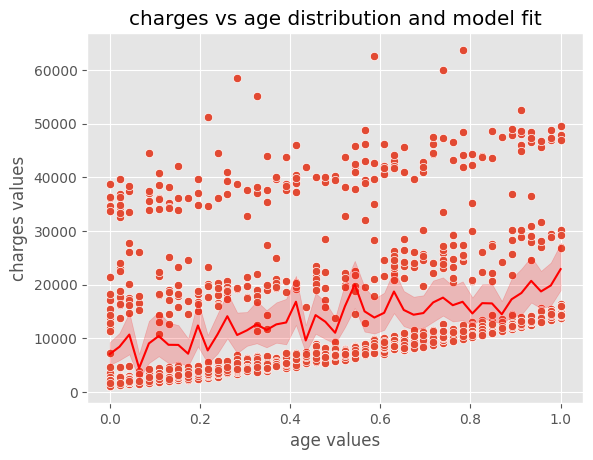

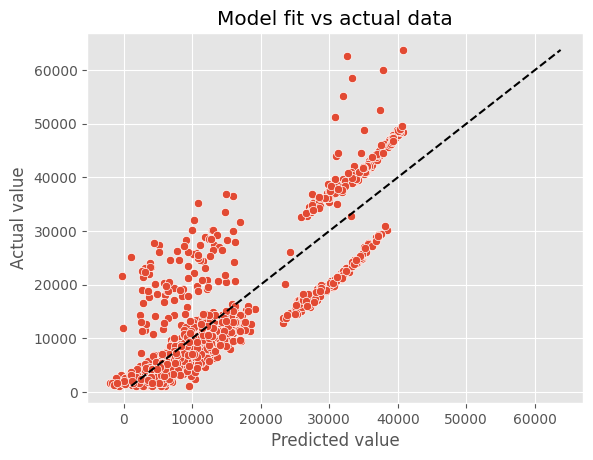

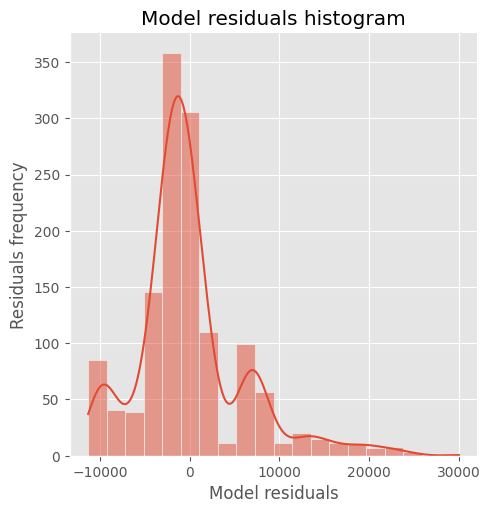

In [117]:
df1, model1 = train_model(df1, target="charges", feature_names=feature_names, show_results=True, pairwise=True)

### Интерпретация коэффициентов 1 модели

- Константа:
Значение -2032.91 отражает уровень выплат при нулевых значениях предикторов

- Возраст (age):
При увеличении нормализованного возраста на 1 единицу страховые выплаты в среднем растут на 11,820. Эффект статистически значим (p < 0.001), что подчеркивает важность возраста в модели

- Пол (sex):
Коэффициент 131.31 (p = 0.693) не показывает статистически значимого влияния

- BMI (bmi):
Увеличение BMI на 1 единицу приводит к росту страховых выплат на 12,610 долларов в среднем (p < 0.001), что свидетельствует о значимости веса для расходов

- Количество детей (children):
Каждый дополнительный ребенок ассоциируется с увеличением выплат примерно на 2,377 долларов (p = 0.001)

- Курение (smoker):
Курильщики платят в среднем на 23,850 долларов больше, чем некурящие (p < 0.001). Это самый сильный предиктор расходов

- Региональные эффекты:

    - region_northwest: Коэффициент -353 (p = 0.459) – влияние незначимо
    - region_southeast: Значение -1,035 (p = 0.031) указывает на снижение выплат на 1,035 долларов по сравнению с базовым регионом
    - region_southwest: Значение -960 (p = 0.045) свидетельствует о снижении выплат на 960 долларов

Метрика: Модель объясняет 75.1% вариации страховых выплат (R^2 = 0.751), что свидетельствует о достаточной объясняющей способности, хотя возможность улучшения остаётся по AIC и BIC.

## Модель 2 (новыми признаками)

Теперь добавим новые фичи: age^2 и собственно разделение по самим когортам

In [118]:
df2 = pd.read_csv(PATH)
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
df2["sex"] = df2["sex"].map({"male": 0, "female": 1})
df2["smoker"] = df2["smoker"].map({"no": 0, "yes": 1})
df2 = pd.get_dummies(df2, columns=["region"], drop_first=True)

binary_features = ["region_northwest", "region_southeast", "region_southwest"]
df2[binary_features] = df2[binary_features].astype(int)

df2["age_squared"] = df2["age"] ** 2 # Возраст в квадрате


df2["Non-Smoker, BMI <=30"] = ((df2["smoker"] == 0) & (df2["bmi"] <= 30)).astype(int)
df2["Non-Smoker, BMI >30"] = ((df2["smoker"] == 0) & (df2["bmi"] > 30)).astype(int)
df2["Smoker, BMI <=30"] = ((df2["smoker"] == 1) & (df2["bmi"] <= 30)).astype(int)
df2["Smoker, BMI >30"] = ((df2["smoker"] == 1) & (df2["bmi"] > 30)).astype(int)

In [120]:
df2.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_squared,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30","Smoker, BMI <=30","Smoker, BMI >30"
0,19,1,27.900,0,1,16884.92400,0,0,1,361,0,0,1,0
1,18,0,33.770,1,0,1725.55230,0,1,0,324,0,1,0,0
2,28,0,33.000,3,0,4449.46200,0,1,0,784,0,1,0,0
3,33,0,22.705,0,0,21984.47061,1,0,0,1089,1,0,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0,1024,1,0,0,0


In [121]:
# Определяем числовые переменные для нормализации
numeric_features = ["age", "bmi", "children", "age_squared"]
scaler = MinMaxScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

df2.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_squared,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30","Smoker, BMI <=30","Smoker, BMI >30"
0,0.021739,1,0.321227,0.0,1,16884.92400,0,0,1,0.009809,0,0,1,0
1,0.000000,0,0.479150,0.2,0,1725.55230,0,1,0,0.000000,0,1,0,0
2,0.217391,0,0.458434,0.6,0,4449.46200,0,1,0,0.121951,0,1,0,0
3,0.326087,0,0.181464,0.0,0,21984.47061,1,0,0,0.202810,1,0,0,0
4,0.304348,0,0.347592,0.0,0,3866.85520,1,0,0,0.185578,1,0,0,0


In [122]:
target = "charges"
feature_names = [col for col in df2.columns if col != target]

feature_names

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'age_squared',
 'Non-Smoker, BMI <=30',
 'Non-Smoker, BMI >30',
 'Smoker, BMI <=30',
 'Smoker, BMI >30']

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     792.1
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:13:33   Log-Likelihood:                -13123.
No. Observations:                1338   AIC:                         2.627e+04
Df Residuals:                    1326   BIC:                         2.633e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5504.2651 

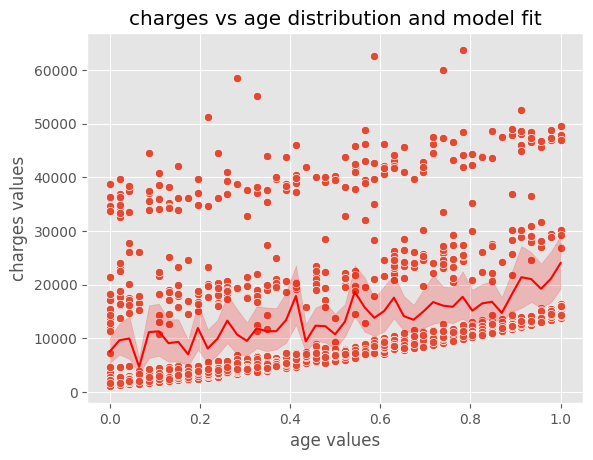

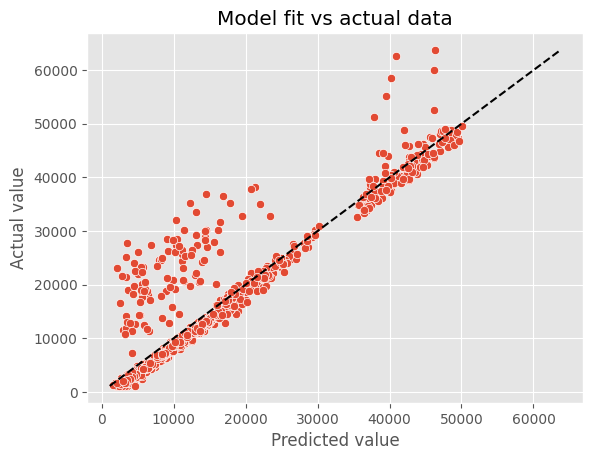

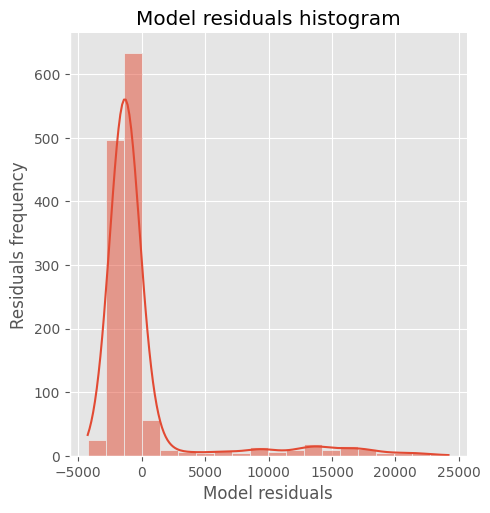

In [123]:
df2, model2 = train_model(df2, target="charges", feature_names=feature_names, show_results=True, pairwise=True)

### Интерпретация коэффициентов 2 модели

- Константа:
Значение 5,504

- Возраст (age):
Коэффициент -997.21 (p = 0.716) не значим

- Возраст в квадрате (age_squared):
Значение 13,570 (p < 0.001) демонстрирует, что влияние возраста на страховые выплаты носит нелинейный характер – с увеличением возраста расходы растут с ускорением

- Пол (sex):
Женщины, в среднем, платят на 476 долларов больше, чем мужчины (p = 0.05), однако эффект на грани статистической значимости

- BMI (bmi):
Увеличение BMI на 1 единицу связано с ростом расходов на 4,248 долларов (p = 0.001)

- Количество детей (children):
Каждый дополнительный ребенок увеличивает страховые выплаты примерно на 3,308 долларов (p < 0.001)

- Курение (smoker):
Курильщики дополнительно платят около 13,070 долларов (p < 0.001)

- Региональные эффекты:

    - region_northwest: Коэффициент -276 (p = 0.427) – влияние незначимо
    - region_southeast: Значение -826 (p = 0.018) указывает на снижение выплат на 826 долларов
    - region_southwest: Значение -1,165 (p = 0.001) – выплаты ниже на 1,165 долларов

- Взаимодействие курения и BMI (категориальные переменные):

    - Non-Smoker, BMI ≤30: Значение -3,311 (p < 0.001) означает, что некурящие с нормальным BMI имеют страховые выплаты на 3,311 долларов ниже по сравнению с базовой категорией
    - Non-Smoker, BMI >30: Значение -4,250 (p < 0.001) – снижение на 4,250 долларов
    - Smoker, BMI ≤30: Значение -2,955 (p < 0.001) – выплаты ниже на 2,955 долларов по сравнению с курильщиками с высоким BMI
    - Smoker, BMI >30: Значение 16,020 (p < 0.001) свидетельствует о том, что курильщики с ожирением – самая затратная группа


Метрика: Модель с нелинейным эффектом возраста и взаимодействиями демонстрирует улучшенные показатели с R^2 = 0.868 и сниженным AIC/BIC, что указывает на более точное описание зависимостей в данных.

## Проверка на гетероскедастичность

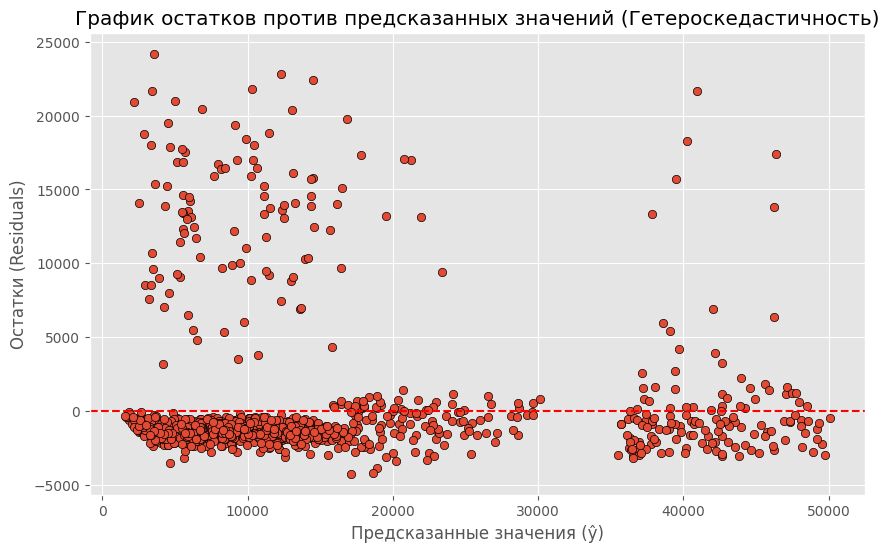

In [124]:
# график остатков против предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(df2["charges_hat"], df2["residuals"], edgecolors="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Предсказанные значения (ŷ)")
plt.ylabel("Остатки (Residuals)")
plt.title("График остатков против предсказанных значений (Гетероскедастичность)")
plt.show()

- Остатки чуть образуют воронку
- Много положительных выбросов

In [125]:
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt

# White-тест на гетероскедастичность
white_test = het_white(df2["residuals"], sm.add_constant(df2[feature_names]))
white_p_value = white_test[1]  # p-value теста

# Голдфельд-Квандт тест
gq_test = het_goldfeldquandt(df2["residuals"], sm.add_constant(df2[feature_names]))
gq_p_value = gq_test[1]  # p-value теста

# Вывод результатов
test_results = pd.DataFrame({
    "Тест": ["White Test", "Goldfeld-Quandt Test"],
    "p-value": [white_p_value, gq_p_value],
    "Гетероскедастичность?": ["Да" if white_p_value < 0.05 else "Нет",
                               "Да" if gq_p_value < 0.05 else "Нет"]
})

test_results

,Тест,p-value,Гетероскедастичность?
0,White Test,0.715256,Нет
1,Goldfeld-Quandt Test,0.975294,Нет


In [126]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_arch

# Тест Бройша-Пагана
bp_test = het_breuschpagan(df2["residuals"], sm.add_constant(df2[feature_names]))
bp_p_value = bp_test[1]  # p-value теста

# Тест ARCH на автокоррелированную гетероскедастичность
arch_test = het_arch(df2["residuals"])
arch_p_value = arch_test[1]  # p-value теста

# Вывод результатов
additional_tests = pd.DataFrame({
    "Тест": ["Breusch-Pagan Test", "ARCH Test"],
    "p-value": [bp_p_value, arch_p_value],
    "Гетероскедастичность?": ["Да" if bp_p_value < 0.05 else "Нет",
                               "Да" if arch_p_value < 0.05 else "Нет"]
})

additional_tests

,Тест,p-value,Гетероскедастичность?
0,Breusch-Pagan Test,0.949415,Нет
1,ARCH Test,0.511726,Нет


### Выводы:

- Визуальный анализ (график остатков) показывал признаки гетероскедастичности, но четыре статистических теста её не подтвердили

- **Гетероскедастичность не обнаружена**

## Проверка на мультиколлинеарность

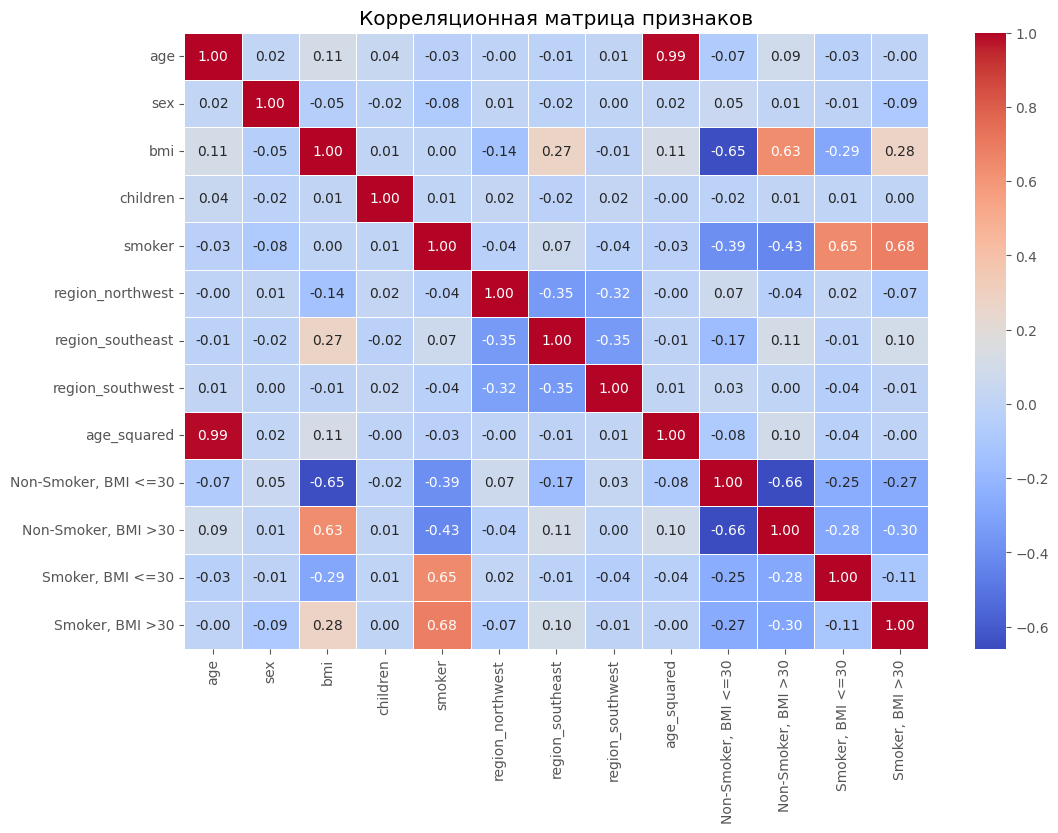

In [127]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(df2[feature_names].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков")
plt.show()

In [128]:
vif_results = calc_VIF(df2, feature_names)

vif_results

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



,Feature,VIF
0,const,0.000000
1,age,47.834506
2,sex,1.010646
3,bmi,2.957088
4,children,1.102630
5,smoker,inf
6,region_northwest,1.519390
7,region_southeast,1.658374
8,region_southwest,1.530253
9,age_squared,47.793223


### Выводы:

Корреляционная матрица (визуальный анализ):

- Сильная корреляция между age и age_squared 0.99 На самом деле ожидаемо так как age_squared — это age в квадрате

- Высокая корреляция между bmi и Non_Smoker, BMI >30 0.63 и bmi с Non_Smoker, BMI <=30 -0.65 это может вызывать проблемы.

Анализ VIF:
- age_squared и age имеют высокие VIF 47.8, проблема мультиколлинеарности
- Остальные факторы в пределах нормы VIF < 10

**Проблема мультиколлинеарности есть**

Решение:
- Исключим age

## Проверим линейность модели

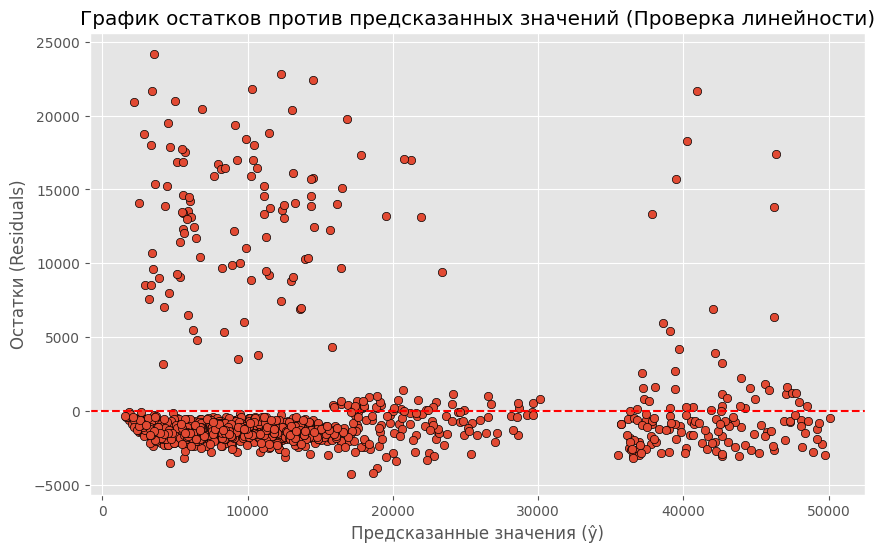

In [129]:
# график остатков против предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(df2["charges_hat"], df2["residuals"], edgecolors="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Предсказанные значения (ŷ)")
plt.ylabel("Остатки (Residuals)")
plt.title("График остатков против предсказанных значений (Проверка линейности)")
plt.show()

### Выводы:

есть намеки на структурный паттерн, что может означать:

- Нелинейность модели (линейные предикторы не полностью описывают зависимость charges).
- Отсутствие некоторых важных факторов.
- Влияние выбросов (особенно при низких charges_hat).

Предпосылка линейности нарушена - остатки не ведут себя случайно

Возможные решения:

- Попробовать логарифмировать charges
- Добавить дополнительные нелинейные факторы


## Проверяем автокорреляцию ошибок (Durbin-Watson)

In [130]:
from statsmodels.stats.stattools import durbin_watson

# Выполняем Durbin-Watson
dw_stat = durbin_watson(df2["residuals"])

dw_stat

np.float64(2.0692681992658457)

### Вывод:

Значение близко к 2, что означает отсутствие автокорреляции ошибок

## Проверяем нормальность остатков

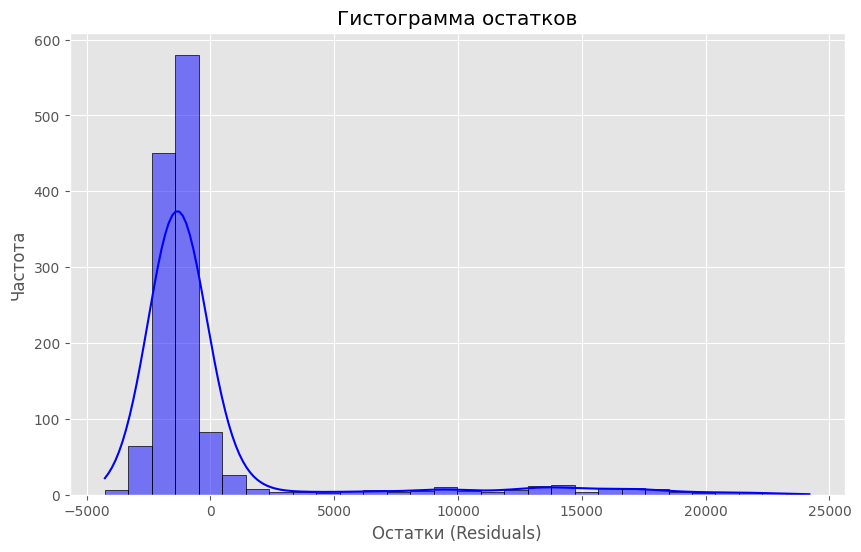

In [131]:
# Построим гистограмму остатков
plt.figure(figsize=(10, 6))
sns.histplot(df2["residuals"], kde=True, bins=30, color="blue", edgecolor="black")
plt.xlabel("Остатки (Residuals)")
plt.ylabel("Частота")
plt.title("Гистограмма остатков")
plt.show()

- Остатки явно не нормальны – распределение сильно скошено вправо
- Много выбросов с положительными значениями

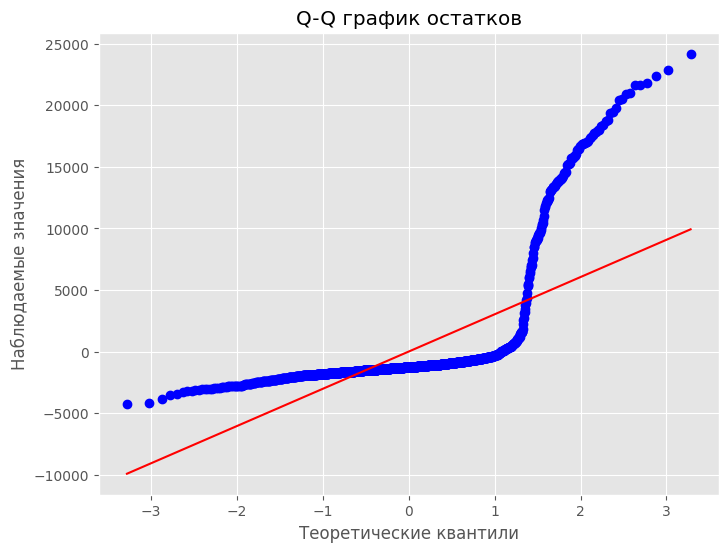

In [132]:
# Построим Q-Q график остатков
plt.figure(figsize=(8, 6))
stats.probplot(df2["residuals"], dist="norm", plot=plt)
plt.title("Q-Q график остатков")
plt.xlabel("Теоретические квантили")
plt.ylabel("Наблюдаемые значения")
plt.show()

- остатки заметно отклоняются

Мы используем Шапиро-Уилка и Д Агостино, чтобы получить более надежный вывод, особенно с учетом выбросов и размера выборки

In [133]:
# Тест Шапиро-Уилка
shapiro_test = stats.shapiro(df2["residuals"])
shapiro_p_value = shapiro_test.pvalue

# Тест Д’Агостино K²
dagostino_test = stats.normaltest(df2["residuals"])
dagostino_p_value = dagostino_test.pvalue

# Вывод результатов тестов
normality_tests = pd.DataFrame({
    "Тест": ["Shapiro-Wilk Test", "D’Agostino K² Test"],
    "p-value": [shapiro_p_value, dagostino_p_value],
    "Нормальность остатков?": ["Нет" if p < 0.05 else "Да" for p in [shapiro_p_value, dagostino_p_value]]
})

normality_tests

,Тест,p-value,Нормальность остатков?
0,Shapiro-Wilk Test,1.349623e-52,Нет
1,D’Agostino K² Test,1.489043e-198,Нет


### Выводы:

тест Шапиро-Уилка и Д Агостино дали p-value < 0.05

вывод: остатки не нормально распределены.

Возможные решения:

- Попробовать логарифмировать charges
- Удалить сильные выбросы

Итоговое заключение

Две предпосылки явно нарушены линейность, нормальность остатков.
Обнаружена мультиколлинеарность.
Автокорреляции ошибок и гетероскедастичности нет


Следующие шаги:
- Логорифмирование charges
- Удаление age для снижения мультиколлинеарности.

## Модель 3 (с применением корректирующих действий)

In [134]:
df2.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_squared,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30","Smoker, BMI <=30","Smoker, BMI >30",charges_hat,residuals
0,0.021739,1,0.321227,0.0,1,16884.92400,0,0,1,0.009809,0,0,1,0,16401.717827,483.206173
1,0.000000,0,0.479150,0.2,0,1725.55230,0,1,0,0.000000,0,1,0,0,3125.555021,-1400.002721
2,0.217391,0,0.458434,0.6,0,4449.46200,0,1,0,0.121951,0,1,0,0,5798.758603,-1349.296603
3,0.326087,0,0.181464,0.0,0,21984.47061,1,0,0,0.202810,1,0,0,0,5115.482226,16868.988384
4,0.304348,0,0.347592,0.0,0,3866.85520,1,0,0,0.185578,1,0,0,0,5609.058693,-1742.203493


In [135]:
df3 = df2.drop(["age", "charges_hat", "residuals"], axis=1)

df3.head()

,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_squared,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30","Smoker, BMI <=30","Smoker, BMI >30"
0,1,0.321227,0.0,1,16884.92400,0,0,1,0.009809,0,0,1,0
1,0,0.479150,0.2,0,1725.55230,0,1,0,0.000000,0,1,0,0
2,0,0.458434,0.6,0,4449.46200,0,1,0,0.121951,0,1,0,0
3,0,0.181464,0.0,0,21984.47061,1,0,0,0.202810,1,0,0,0
4,0,0.347592,0.0,0,3866.85520,1,0,0,0.185578,1,0,0,0


In [136]:
df3["log_charges"] = np.log(df3["charges"])


In [137]:
df3.drop("charges", axis=1, inplace=True)

In [138]:
df3.head()

,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,age_squared,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30","Smoker, BMI <=30","Smoker, BMI >30",log_charges
0,1,0.321227,0.0,1,0,0,1,0.009809,0,0,1,0,9.734176
1,0,0.479150,0.2,0,0,1,0,0.000000,0,1,0,0,7.453302
2,0,0.458434,0.6,0,0,1,0,0.121951,0,1,0,0,8.400538
3,0,0.181464,0.0,0,1,0,0,0.202810,1,0,0,0,9.998092
4,0,0.347592,0.0,0,1,0,0,0.185578,1,0,0,0,8.260197


In [139]:
target = "log_charges"
feature_names = [col for col in df3.columns if col != target]

feature_names

['sex',
 'bmi',
 'children',
 'smoker',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'age_squared',
 'Non-Smoker, BMI <=30',
 'Non-Smoker, BMI >30',
 'Smoker, BMI <=30',
 'Smoker, BMI >30']

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     460.5
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:13:46   Log-Likelihood:                -783.98
No. Observations:                1338   AIC:                             1590.
Df Residuals:                    1327   BIC:                             1647.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0879 

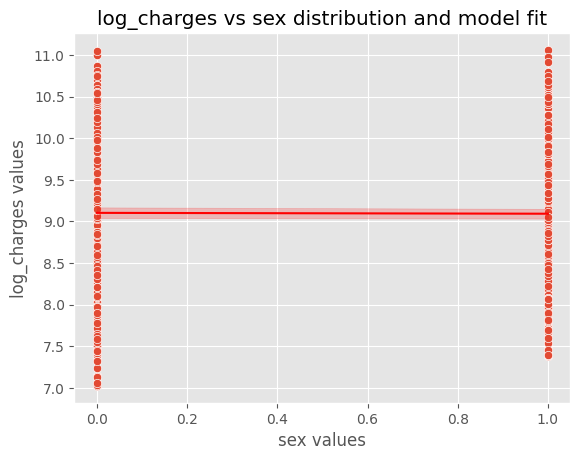

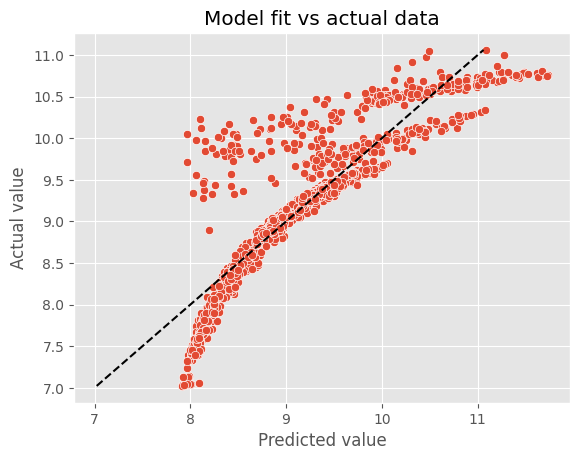

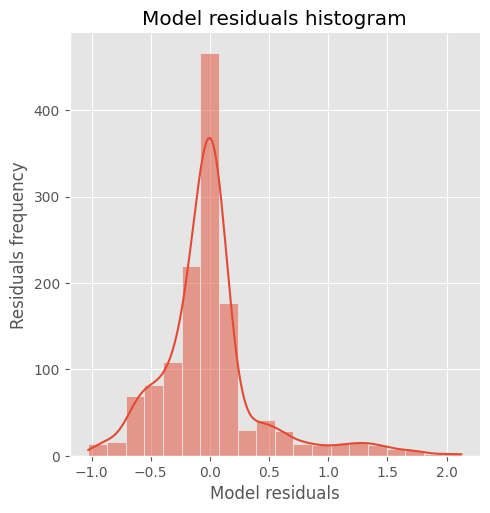

In [140]:
df3, model3 = train_model(df3, target=target, feature_names=feature_names, show_results=True, pairwise=True)

### Интерпретация коэффициентов 3 модели

- Константа:
Значение 6.0879

- Пол (sex):
Коэффициент 0.0878 (p < 0.001) указывает, что страховые выплаты для женщин выше

- BMI (bmi):
При увеличении BMI на 1 единицу страховые выплаты растут примерно на exp(0.2787) – 1 ≈ 32%.

- Количество детей (children):
Каждый дополнительный ребенок ассоциируется с ростом расходов примерно на exp(0.6074) – 1 ≈ 83%.

- Курение (smoker):
Коэффициент 2.2915 (p < 0.001) означает, что курильщики имеют выплаты, превышающие выплаты некурящих примерно в exp(2.2915) – 1 ≈ 998%.

- Региональные эффекты:

    - region_northwest: Коэффициент -0.0624 (p ≈ 0.069) соответствует снижению на exp(-0.0624) – 1 ≈ -6%.
    - region_southeast: Коэффициент -0.1529 (p < 0.001) – снижение на ~14.2%.
    - region_southwest: Коэффициент -0.1359 (p < 0.001) – снижение на ~12.7%.

- Возраст в квадрате (age_squared):
Значение 1.6007 (p < 0.001) подчеркивает нелинейное влияние возраста – увеличение нормализованного квадрата возраста на 1 единицу связано с ростом расходов примерно на exp(1.6007) – 1 ≈ 395%. Интерпретация данной переменной требует осторожности ввиду особенностей нормализации.

- Взаимодействие курения и BMI:
Коэффициенты для категориальных переменных отражают дополнительные процентные эффекты:

    - Non-Smoker, BMI ≤30: Коэффициент 1.9238 (exp(1.9238) ≈ 6.85) указывает на значительное снижение расходов по сравнению с базовой категорией.
    - Non-Smoker, BMI >30: Коэффициент 1.8726 (exp(1.8726) ≈ 6.50).
    - Smoker, BMI ≤30: Коэффициент 0.8492 (exp(0.8492) ≈ 2.34).
    - Smoker, BMI >30: Коэффициент 1.4423 (exp(1.4423) ≈ 4.23).

Метрика: Логарифмическая модель показала снижение объясняющей способности до R^2 = 0.776, что указывает на ухудшение качества прогноза по сравнению с исходной спецификацией, несмотря на упрощение интерпретации процентных эффектов.


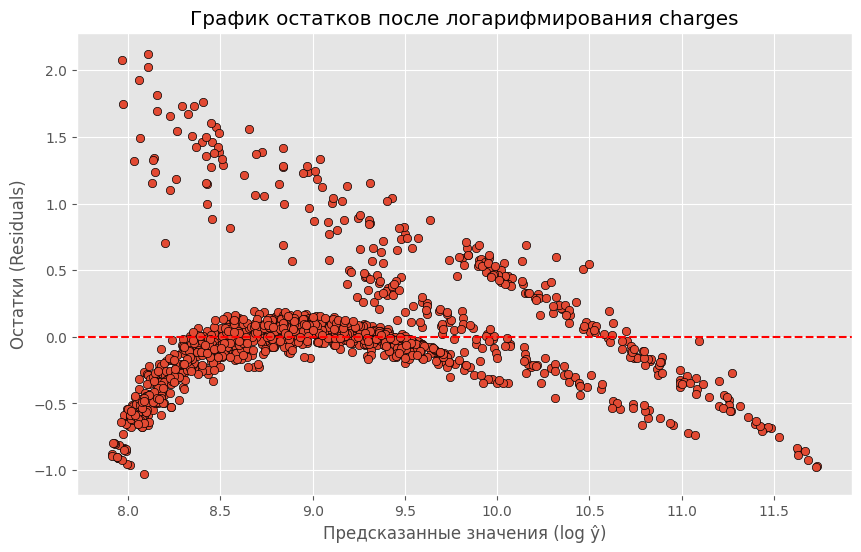

In [141]:
# Визуализируем остатки новой модели
plt.figure(figsize=(10, 6))
plt.scatter(df3["log_charges_hat"], df3["residuals"], edgecolors="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Предсказанные значения (log ŷ)")
plt.ylabel("Остатки (Residuals)")
plt.title("График остатков после логарифмирования charges")
plt.show()

- Линейность модели ухудшилась

## Модель 4 (убираем логарифмирование)

In [142]:
df4 = df2.drop(["age", "charges_hat", "residuals"], axis=1)

df4.head()

,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_squared,"Non-Smoker, BMI <=30","Non-Smoker, BMI >30","Smoker, BMI <=30","Smoker, BMI >30"
0,1,0.321227,0.0,1,16884.92400,0,0,1,0.009809,0,0,1,0
1,0,0.479150,0.2,0,1725.55230,0,1,0,0.000000,0,1,0,0
2,0,0.458434,0.6,0,4449.46200,0,1,0,0.121951,0,1,0,0
3,0,0.181464,0.0,0,21984.47061,1,0,0,0.202810,1,0,0,0
4,0,0.347592,0.0,0,3866.85520,1,0,0,0.185578,1,0,0,0


In [143]:
target = "charges"
feature_names = [col for col in df4.columns if col != target]

feature_names

['sex',
 'bmi',
 'children',
 'smoker',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'age_squared',
 'Non-Smoker, BMI <=30',
 'Non-Smoker, BMI >30',
 'Smoker, BMI <=30',
 'Smoker, BMI >30']

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     871.9
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:13:50   Log-Likelihood:                -13123.
No. Observations:                1338   AIC:                         2.627e+04
Df Residuals:                    1327   BIC:                         2.633e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5458.9372 

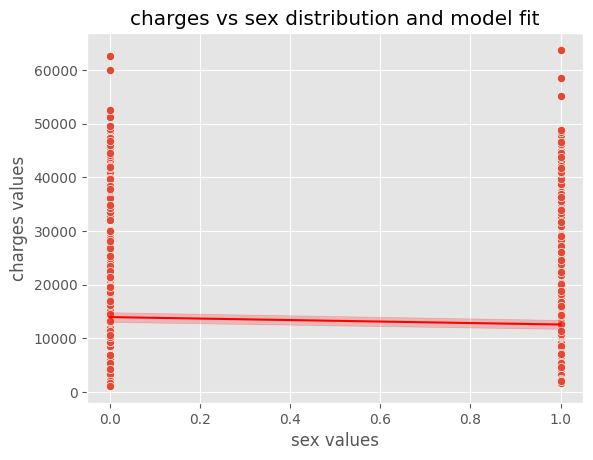

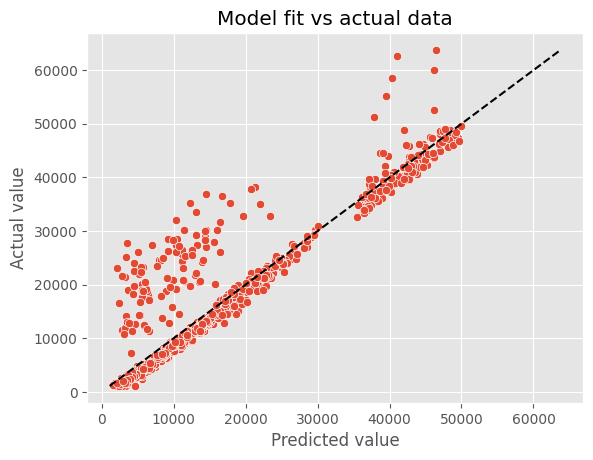

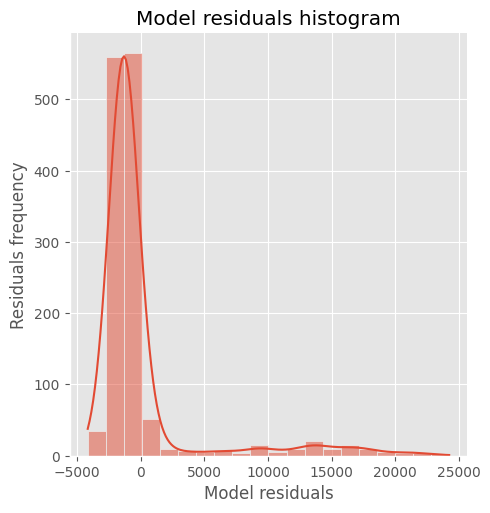

In [144]:
df4, model3 = train_model(df4, target=target, feature_names=feature_names, show_results=True, pairwise=True)

Интерпретация коэффициентов 4 модели

- Константа:
Значение 5,459

- Пол (sex):
Женщины платят в среднем на 475 долларов больше, чем мужчины (коэффициент 474.95, p ≈ 0.05), хотя эффект не является очень сильным.

- BMI (bmi):
При увеличении BMI на 1 единицу страховые выплаты растут на 4,228 долларов (p < 0.01).

- Количество детей (children):
Каждый дополнительный ребенок повышает выплаты примерно на 3,250 долларов (p < 0.001).

- Курение (smoker):
Курильщики дополнительно платят около 13,050 долларов (p < 0.001).

- Региональные эффекты:

    - region_southeast: Страховые выплаты ниже на 825 долларов (значимый эффект).
    - region_southwest: Выплаты ниже на 1,165 долларов (значимый эффект).
    - region_northwest: Коэффициент -275 не достигает статистической значимости.

- Эффект возраста:
Хотя переменная «age» исключена для снижения мультиколлинеарности, влияние возраста ранее отражалось через квадратичный член с оценкой ≈ 12,560 (p < 0.001).

- Взаимодействие курения и ожирения:

    - Некурящие с BMI ≤30 имеют страховые выплаты на 3,333 долларов ниже, а некурящие с BMI >30 – на 4,261 долларов ниже по сравнению с базовой (наиболее затратной) категорией.
    - Курильщики с BMI ≤30 – на 2,965 долларов ниже, чем курильщики с BMI >30, что подтверждает, что сочетание курения с ожирением является наиболее затратным.

Метрика: Финальная модель демонстрирует приемлемые значения R^2, AIC и BIC, сохраняя баланс между интерпретируемостью коэффициентов и качеством прогноза, что делает её предпочтительной для дальнейшего анализа.

## Критерии выбора финальной модели
- Качество модели (R^2)
    - R^2 = 0.868 у финальной модели (лучшее объяснение дисперсии).
    - В логарифмической модели R^2 = 0.776, что значительно хуже.
- Критерии информационной теории (AIC/BIC)

    - Финальная модель имеет лучшие AIC/BIC (26,270 / 26,330 против 1,590 / 1,647).
    - AIC/BIC учитывают баланс точности модели и её сложности – меньшие значения означают лучшую обобщаемость.
- Линейность модели
    - В логарифмической модели наблюдался U-образный паттерн в остатках → нарушение линейности.
    - Финальная модель лучше соответствует линейной регрессии.
- Интерпретируемость коэффициентов

    - В логарифмической модели коэффициенты отражали процентные изменения, что усложняло интерпретацию.
    - В финальной модели коэффициенты показывают абсолютное влияние факторов, что удобнее для анализа.


Итоговый вывод:
- Финальная модель показала лучшие метрики (R^2, AIC/BIC) и соответствие линейности.
- Логарифмирование charges не дало улучшения – напротив, оно ухудшило метрики и внесло нелинейность.

Финальная спецификация модели: без age и без логарифмирования charges

## Outro

В исследовании построена и проанализирована модель линейной регрессии для предсказания страховых выплат (charges). Проверены предпосылки Гаусса-Маркова и приняты соответствующие корректирующие модель действия

Финальная модель выбрана на основе:

R^2 = 0.868 – лучшее качество предсказаний.
Минимальных AIC/BIC – оптимальный баланс точности и сложности.
Линейности остатков – отсутствие U-образного паттерна.
Финальная модель: без age и без логарифмирования charges – наилучшая по метрикам и интерпретации.